# Libraries

In [1]:
!pip install deep-translator
!pip install geopandas
!pip install geocoder
!pip install mapclassify
!pip install stargazer

     |████████████████████████████████| 97 kB 5.6 MB/s 
     |████████████████████████████████| 97 kB 6.0 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.
     |████████████████████████████████| 1.0 MB 22.5 MB/s 
     |████████████████████████████████| 15.4 MB 42.7 MB/s 
     |████████████████████████████████| 6.3 MB 40.8 MB/s 
     |████████████████████████████████| 98 kB 6.6 MB/s 


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import t
from scipy.stats import f
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.preprocessing import OrdinalEncoder
from plotnine import *

import seaborn as sns
from collections import Counter

import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from deep_translator import GoogleTranslator
import geocoder
import requests
from stargazer.stargazer import Stargazer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Kamatz project

**Research question. 
Name the topic & which questions you aim to answer (1-2 paragraphs).**

We are going to analyze the determinants of pricing in Kamatz. We build a regression model using the following features:
*  years of experience
*  number of skills
*  number of recommendations
*  ethnicity (arab, white, asian, black, hispanic)
*  gender (male, female)


We aim to understand, through the analysis of the regression model, what are the most important features determining the tariff of freelancers. 
Furthermore, the analysis aims to see if there are differences among the ethnicities so that maybe those who suffer from discrimination have incentives to provide more information. We also inspect discrimination between males and females.
Similarly, we study the determinant of ranking of Kamatz to analyze if the platform’s algorithm has discriminatory behaviors. 

We try to develop an algorithm, based on a similarity function, to answer the question "Are the freelancers' skills match with the searched job?". The aim is to understand the efficacy of Kamatz in showing the results and also to understand the quality of the freelancers and then the quality of a platform.




**Organizations of the code**
  * download data
  * data cleaning and data visualization
    * Data Description and Data Cleaning
    * Histograms of the features
    * Plotting maps about freelancers' location
    * Tarif per gender
    * Tarif per ethnicity
    * Tarif per gender and ethnicity
    * Tarif per job and ethnicity
    * Top25 skills in the whole platform 
    * Top10 skills for each different platform

When searching for a job, Kamatz shows us almost all freelancers, even if their skills do not match with the searched job. So, we try to figure out, how many freelancers are really suitable for a specific searched job analyzing their skills.
More details in the section:
  * Are their skills matching the searched tasks?

  * Regression on tariff
  * Regression on rank

## Download data

In [3]:
url = 'https://raw.githubusercontent.com/RiccardoPrestigiacomo-99/analyse_kam/main/all.csv'
df = pd.read_csv(url, sep = ',')
df.head(5)

,name,id,location,title,experience,skills,nb_skills,tarif,recommendations,path_to_profile,skills_count,languages,isEducationListed,months_experience,num_experiences,searched_job,search_rank,fetched_at,region,sub-region,ethnicity,gender
0,Saker Kadri,bc5mh7ud4sc8,"Tunis, Tunisie",Administrateur bases de données,3 à 7 ans d'expérience,"['Microsoft Excel', 'Microsoft PowerPoint', 'S...",5,20€,0,/fr/freelance/saker-kadri,5,"[{'level': 5, 'lang': 'en'}, {'level': 5, 'lan...",False,0,0,Administrateur Base de Données,1,2022-01-05 20:05:10.382447,Africa,Northern Africa,asian,male
1,Joffrey Michaïe,xj3yn4yg0es7,"Paris, France",Consultant Bases de données,plus de 7 ans d'expérience,"['MySQL', 'MariaDB', 'Galera', 'Percona', 'Lin...",6,2400€,0,/fr/freelance/joffrey-michaie,6,"[{'level': 5, 'lang': 'en'}, {'level': 5, 'lan...",False,0,0,Administrateur Base de Données,2,2022-01-05 20:05:10.866183,Europe,Western Europe,white,male
2,MARTER,gv2bs7iy5gy2,"Bischheim, France",SECRÉTAIRE ASSISTANT - ADMINISTRATEUR WEB,3 à 7 ans d'expérience,"['accueil téléphonique', 'Word', 'Excel', 'Sec...",17,200€,0,/fr/freelance/marter,17,"[{'level': 2, 'lang': 'en'}]",True,0,0,Administrateur Base de Données,3,2022-01-05 20:05:11.303683,Europe,Western Europe,white,male
3,MAALAOUI Chedia,tj6fi0qk3gc2,"Herblay, France",Gestionnaire administrative (gestion de données),plus de 7 ans d'expérience,"['Gestion administrative', 'Gestion commercial...",7,290€,0,/fr/freelance/maalaoui-chedia,7,[],False,0,0,Administrateur Base de Données,4,2022-01-05 20:05:11.881838,Europe,Western Europe,asian,female
4,Ella Kpozé,ti0qm8uu3yz2,"Paris, France",Analyse de données & Etudes marketing,plus de 7 ans d'expérience,"['Analyse de données', 'Étude Marketing', 'Ges...",21,550€,0,/fr/freelance/ella-kpoze,21,"[{'level': 5, 'lang': 'en'}]",True,233,5,Administrateur Base de Données,5,2022-01-05 20:05:12.397737,Europe,Western Europe,white,female


We will drop some columns that are not useful for our purpose such as: path_to_profile and fetched_at.

In [4]:
df.drop(columns=["path_to_profile","skills_count","fetched_at"], inplace=True)
df.head(2)

,name,id,location,title,experience,skills,nb_skills,tarif,recommendations,languages,isEducationListed,months_experience,num_experiences,searched_job,search_rank,region,sub-region,ethnicity,gender
0,Saker Kadri,bc5mh7ud4sc8,"Tunis, Tunisie",Administrateur bases de données,3 à 7 ans d'expérience,"['Microsoft Excel', 'Microsoft PowerPoint', 'S...",5,20€,0,"[{'level': 5, 'lang': 'en'}, {'level': 5, 'lan...",False,0,0,Administrateur Base de Données,1,Africa,Northern Africa,asian,male
1,Joffrey Michaïe,xj3yn4yg0es7,"Paris, France",Consultant Bases de données,plus de 7 ans d'expérience,"['MySQL', 'MariaDB', 'Galera', 'Percona', 'Lin...",6,2400€,0,"[{'level': 5, 'lang': 'en'}, {'level': 5, 'lan...",False,0,0,Administrateur Base de Données,2,Europe,Western Europe,white,male


## Data cleaning and data visualization

### Data Description and data cleaning

In [5]:
df.groupby(by=["searched_job"]).count()

,name,id,location,title,experience,skills,nb_skills,tarif,recommendations,languages,isEducationListed,months_experience,num_experiences,search_rank,region,sub-region,ethnicity,gender
searched_job,,,,,,,,,,,,,,,,,,
Administrateur Base de Données,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2279,2279
Assistant Administratif,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371
Assistant Personnel,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350
Brand Designer,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,948,948
Brand Manager,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485
Business Analyst,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481
Chef de project Digital,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2316,2316
Community Manager,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525
Concepteur-Rédacteur,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85


In [6]:
df.shape

(28732, 19)

In [7]:
dft = df.drop_duplicates(subset="id")
dft.groupby(by=["searched_job"]).count()

,name,id,location,title,experience,skills,nb_skills,tarif,recommendations,languages,isEducationListed,months_experience,num_experiences,search_rank,region,sub-region,ethnicity,gender
searched_job,,,,,,,,,,,,,,,,,,
Administrateur Base de Données,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2264,2264
Assistant Administratif,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Assistant Personnel,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Brand Designer,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
Brand Manager,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Business Analyst,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Chef de project Digital,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Concepteur-Rédacteur,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Consultant Stratégie Marketing,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


**Comment**

Apparently, there are many freelancers (28 732) but when we remove duplicates we only have 2449. The problem is the platform algorithm itself. 

**Problem**

When searching for a job, Kamatz displays firstly the freelancers that are suitable for that job, then, almost all the remaining freelancers (even if the title and skills do not match with the searched job).

**Solution**

To balance the dataset and to obtain more reliable data we take the first 150 freelancers for each searched job. 

In [8]:
df = pd.read_csv(url, sep = ',')
d = {}
for k,v in df.groupby(by=["searched_job"]):
  """ we only keep the first 150 results for each searched_job """
  d[k] = pd.DataFrame(v[0:150])
  
dfm = pd.concat(d.values(), ignore_index=True)

dfm.drop_duplicates(subset="id",inplace=True)
print(dfm.shape)

(2004, 22)


In [9]:
dfm.groupby(by=["searched_job"]).count()

,name,id,location,title,experience,skills,nb_skills,tarif,recommendations,path_to_profile,skills_count,languages,isEducationListed,months_experience,num_experiences,search_rank,fetched_at,region,sub-region,ethnicity,gender
searched_job,,,,,,,,,,,,,,,,,,,,,
Administrateur Base de Données,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
Assistant Administratif,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136
Assistant Personnel,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
Brand Designer,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,148,148
Brand Manager,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
Business Analyst,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
Chef de project Digital,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
Community Manager,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Concepteur-Rédacteur,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67


**Comment** 

In this way, we obtain a less number of freelancers. 2004 against 2449 of the platform but we gain on quality of data. We work with this version of the dataset for the visualization part.

In [10]:
dfm.describe()

,nb_skills,recommendations,skills_count,months_experience,num_experiences,search_rank
count,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000
mean,13.303892,0.055389,13.303892,47.640719,1.996008,73.952595
std,10.146750,0.333555,10.146750,82.964252,2.937523,43.138843
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,7.000000,0.000000,7.000000,0.000000,0.000000,37.000000
50%,10.000000,0.000000,10.000000,7.000000,1.000000,72.000000
75%,17.000000,0.000000,17.000000,65.000000,3.000000,111.000000
max,83.000000,5.000000,83.000000,857.000000,47.000000,150.000000


In [11]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 0 to 5339
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               2004 non-null   object
 1   id                 2004 non-null   object
 2   location           2004 non-null   object
 3   title              2004 non-null   object
 4   experience         2004 non-null   object
 5   skills             2004 non-null   object
 6   nb_skills          2004 non-null   int64 
 7   tarif              2004 non-null   object
 8   recommendations    2004 non-null   int64 
 9   path_to_profile    2004 non-null   object
 10  skills_count       2004 non-null   int64 
 11  languages          2004 non-null   object
 12  isEducationListed  2004 non-null   bool  
 13  months_experience  2004 non-null   int64 
 14  num_experiences    2004 non-null   int64 
 15  searched_job       2004 non-null   object
 16  search_rank        2004 non-null   int64 


Ethnicity and gender have some null values, we remove them.

In [12]:
dfm.dropna(inplace=True)
print(dfm.shape)

(2002, 22)


### Histogram of the features

Text(0.5, 0, 'Number of recommendations')

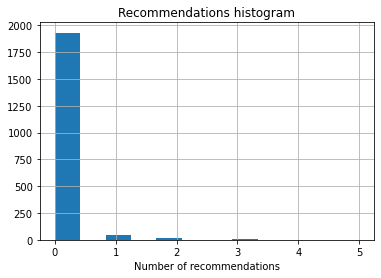

In [13]:
dfm.recommendations.hist(bins="auto");
plt.title("Recommendations histogram")
plt.xlabel("Number of recommendations")

In [14]:
Counter(dfm.recommendations)

Counter({0: 1930, 1: 46, 2: 18, 3: 5, 4: 1, 5: 2})

**Comment**

Almost everyone has 0 recommendations, only 46 have 1 recommendation and very few have more than 1. Since the platform is new is reasonable that lots of freelancers have no recommendations.

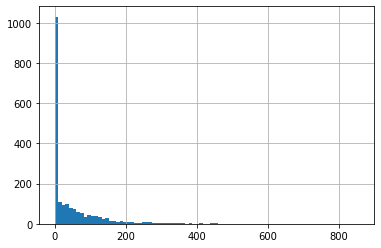

In [15]:
dfm.months_experience.hist(bins="auto");

Counter({"1 à 2 ans d'expérience": 459,
         "3 à 7 ans d'expérience": 833,
         "plus de 7 ans d'expérience": 710})

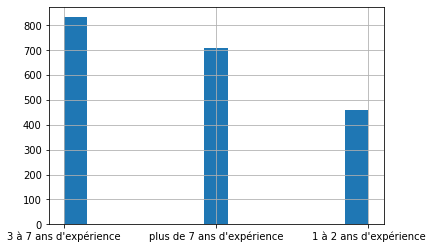

In [16]:
dfm.experience.hist(bins="auto");
Counter(dfm.experience)

**Comment** 

Here data seems to be contradictory: there are more than 1000 freelancers with 0 months of experience and only 459 with '1 à 2 ans d'expérience'. The problem is that months of experience is a feature calculated (by us) summing all the duration of the job experiences that each freelancer puts, if he wants, in his profile. While the other feature is mandatory and is requested by the platform during the subscription. 

Since is not mandatory to put all job experiences, some freelancers don't care about that, even if they have many years of experience. As result, these freelancers have no months of experience. 
In conclusion, we decide to not use this feature since is not reliable.  

Counter({'Africa': 90, 'Americas': 2, 'Asia': 2, 'Europe': 1907, 'Oceania': 1})

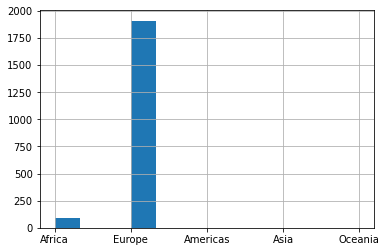

In [17]:
dfm.region.hist(bins="auto")
Counter(dfm.region)

#try piechart

**Comment**

Since it's a french platform it is reasonable that almost everyone comes from Europe, only a few are African. 

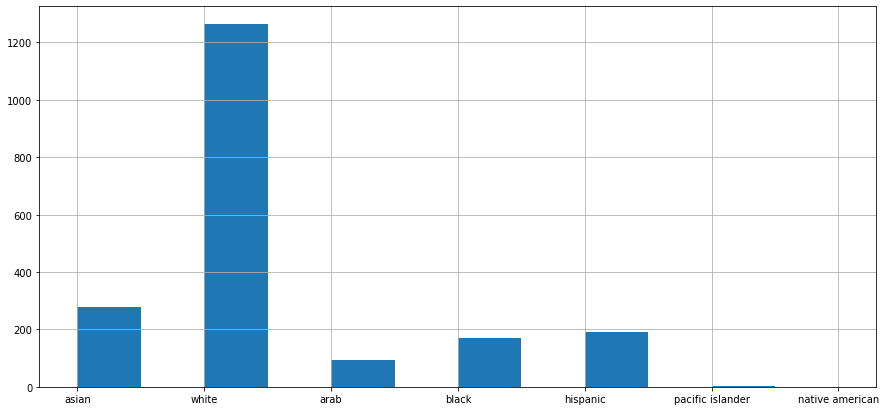

In [18]:
dfm.ethnicity.hist(bins="auto",figsize=(15,7));

**Comment** 

We do not have too many records for the ethnicity "pacific islander" and "native american". We remove them since it's not a sufficient representative sample.

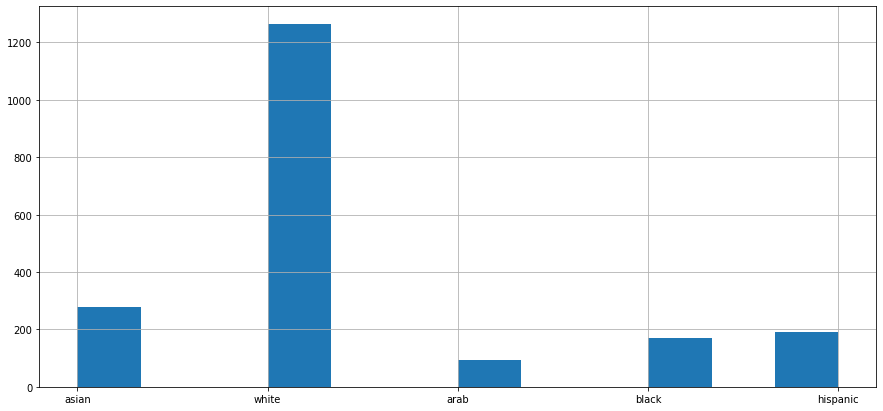

In [19]:
dfm.drop(dfm[dfm.ethnicity == "pacific islander"].index, inplace=True)
dfm.drop(dfm[dfm.ethnicity == "native american"].index, inplace=True)
dfm.ethnicity.hist(bins="auto",figsize=(15,7));

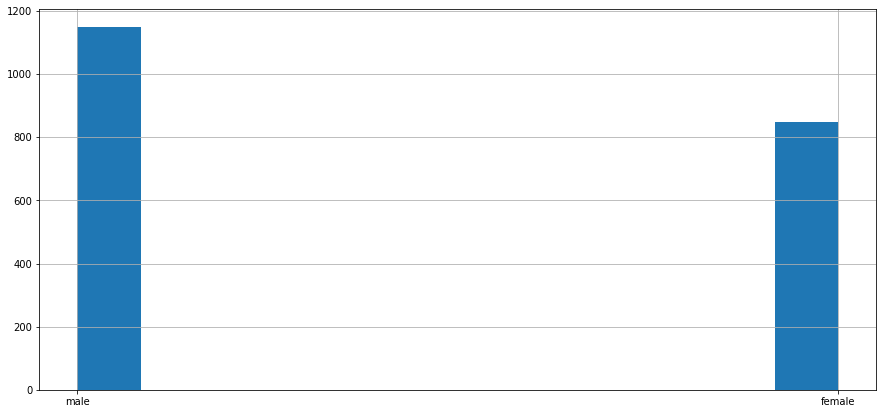

In [20]:
dfm["gender"].hist(bins="auto",figsize=(15,7));

### Plotting maps about freelancers

In [21]:
#dropping duplicates 
df_unique = df.drop_duplicates(subset="id").dropna()

In [22]:
#creating a new column country extracting it from location
df_unique["country"] = df_unique["location"].apply(lambda x : x.split(",")[1])
df_location = pd.DataFrame({'count' : df_unique.groupby(by="country").name.count()}).reset_index()

#translating countries' name because they were in French
translator = GoogleTranslator(source='fr', target='en')
df_location.country = df_location.country.apply(lambda x : translator.translate(x))

#left join between the world dataset and  
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_location_world = df_world.merge(df_location, how="left", left_on=['name'], right_on=['country'])

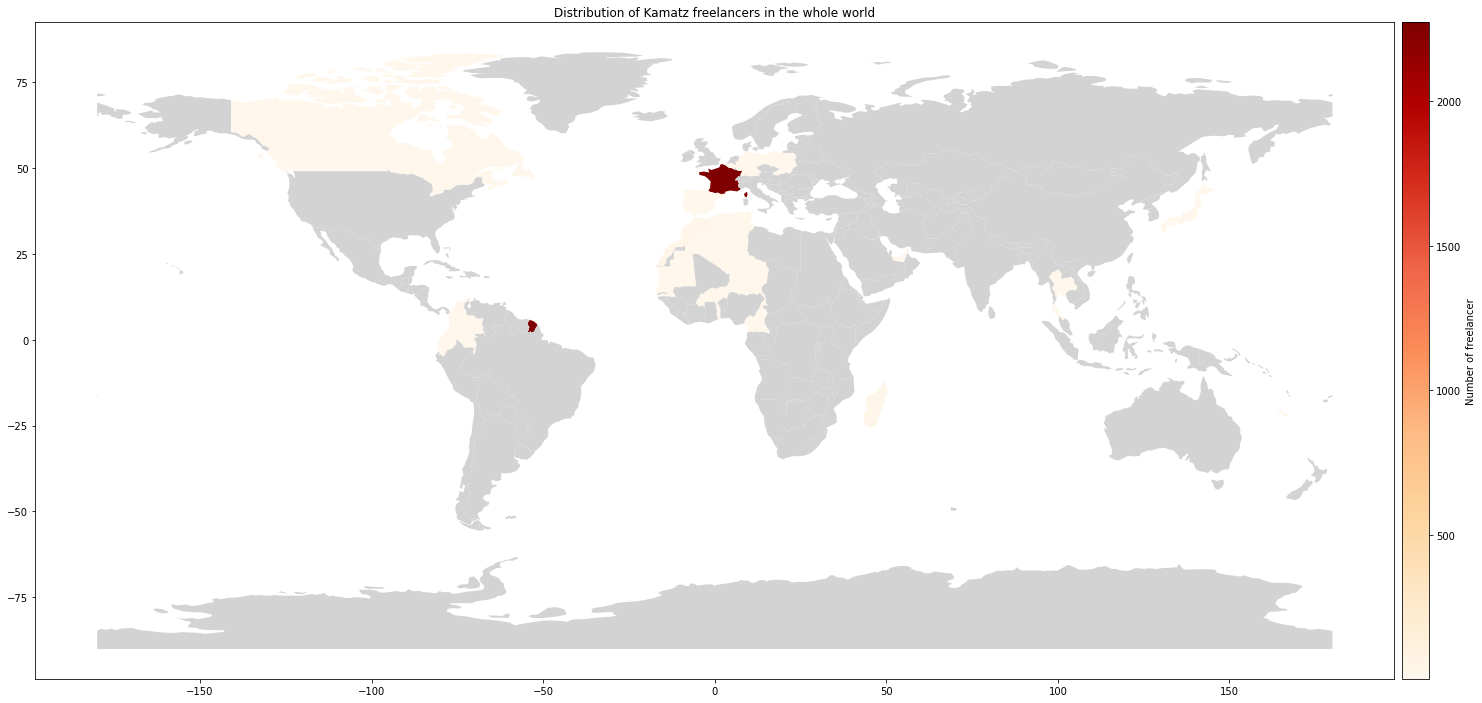

In [23]:
#plotting distribution in the whole world using geopandas and matplotlib
fig, ax = plt.subplots(1, 1, figsize=(25, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad="0.5%")
ax.set_title("Distribution of Kamatz freelancers in the whole world")
df_location_world.plot(column="count", ax=ax, cax=cax, cmap='OrRd', legend=True, legend_kwds={"label": "Number of freelancer"}, missing_kwds={'color': 'lightgrey'})

To better visualize where are the freelancers that are using the platform we plot, exploiting geopandas library, the map of the world with the distribution of users per country. Since, it's a new French platform, we can see that most of the users come from there or from francophone countries.

In [24]:
#distribution in France
#selecting only the location that are in France and grouping by each city to count the frequence of freelancer in each of them
df["country"] = df["location"].apply(lambda x : x.split(", ")[1])
df_location = pd.DataFrame({'count' : df[df["country"]=="France"].groupby(by="location").name.count()}).reset_index()

#using geocoder, we get the latitude and longitude of cities and we create new fields for them
df_location["latLong"] = df_location["location"].apply(lambda x : geocoder.arcgis(x).latlng)
df_location["lat"] = df_location["latLong"].apply(lambda x: x[0])
df_location["lon"] = df_location["latLong"].apply(lambda x: x[1])

#with geopandas we get the GeoDataFrame using lat and long
df_location_gpd = gpd.GeoDataFrame(df_location, geometry=gpd.points_from_xy(df_location["lon"], df_location["lat"]))

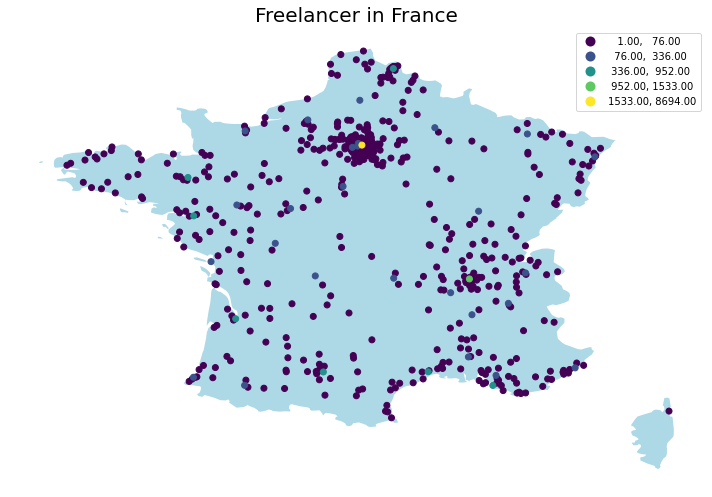

In [25]:
#downloading a json Europe map 
url = "https://github.com/leakyMirror/map-of-europe/raw/master/GeoJSON/europe.geojson"
r = requests.get(url, allow_redirects=True)
open("europe.geojson.txt", "wb").write(r.content)

europe_map = gpd.read_file("europe.geojson.txt")
fig, ax = plt.subplots(figsize=(10, 10))
europe_map[europe_map["NAME"] == "France"].plot(ax=ax, zorder=1, color="lightblue")

#excluding those in the Martinican because of problem of visualization
df_location_gpd = df_location_gpd[df_location_gpd.lat>18]
points = df_location_gpd.sort_values(by="count").plot(ax=ax, zorder=2, column="count", scheme="NaturalBreaks", legend=True)
ax.set_axis_off()
ax.set_title("Freelancer in France", fontdict={"fontsize":20})

# Final adjustments
fig.tight_layout() #tidy up the figure 

As we were expecting, plotting the distribution of Kamatz freelancers in France, the greatest concentration is in Paris and in general in the Île-de-France region. We can also notice that we have high concentration around Lyon and in the south east coast.

### Tarif per gender

Since tarif is a string of the following format: x€, we convert into a number using the function getSalary().

In [26]:
def getSalary(x):
  euro = x.find("€")
  return x[:euro]

dfm.tarif = dfm.tarif.apply(getSalary)
dfm.tarif = dfm.tarif.astype(int)

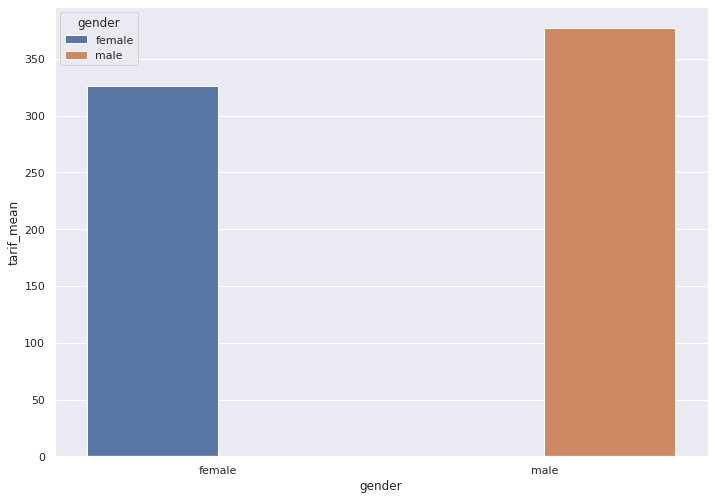

In [27]:
df = dfm
gender = []
tarif_mean = []
for k,v in df.groupby(by=["gender"]):
  gender.append(k)
  tarif_mean.append(v.tarif.mean())

data = {"gender": gender,
        "tarif_mean": tarif_mean
        }
df1 = pd.DataFrame(data)
df1.head()

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="gender", y="tarif_mean", hue="gender", data=df1)

**Comment**

From this graph, we can see that females, on average, earn a little less than males. 

### Tarif per ethnicity

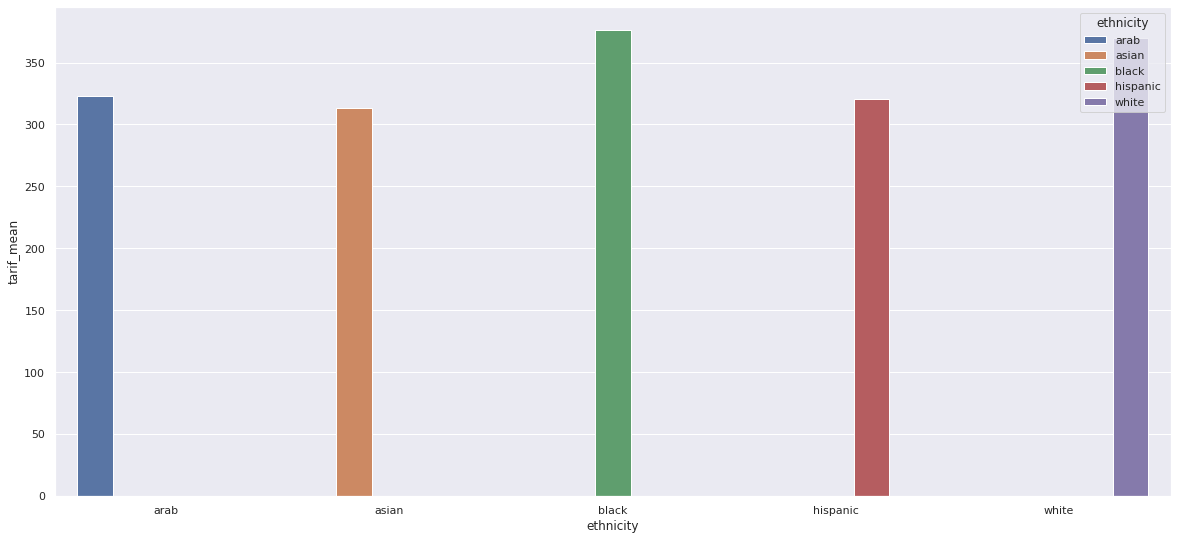

In [28]:
ethnicity = []
tarif_mean = []
for k,v in df.groupby(by=["ethnicity"]):
  ethnicity.append(k)
  tarif_mean.append(v.tarif.mean())

data = {"ethnicity": ethnicity,
        "tarif_mean": tarif_mean
        }
df2 = pd.DataFrame(data)
df2.head()


sns.set(rc={'figure.figsize':(20,9)})
ax = sns.barplot(x="ethnicity", y="tarif_mean", hue="ethnicity", data=df2)

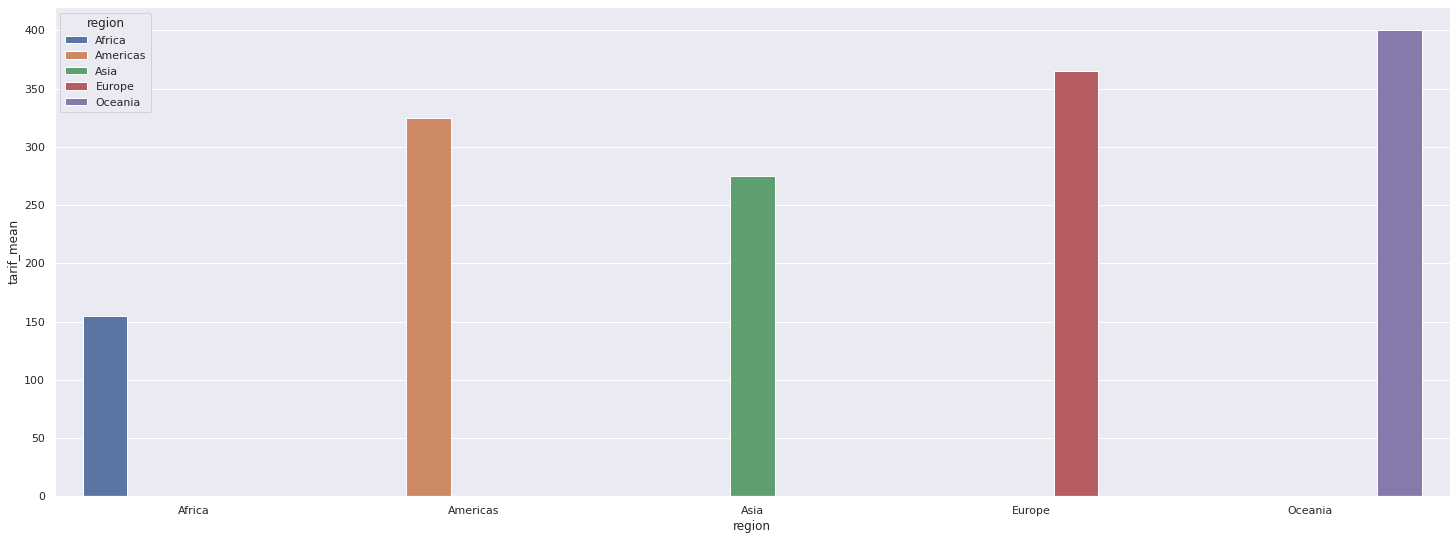

In [29]:
region = []
tarif_mean = []
for k,v in df.groupby(by=["region"]):
  region.append(k)
  tarif_mean.append(v.tarif.mean())

data = {"region": region,
        "tarif_mean": tarif_mean
        }
df2 = pd.DataFrame(data)
df2.head()


sns.set(rc={'figure.figsize':(25,9)})
ax = sns.barplot(x="region", y="tarif_mean", hue="region", data=df2)

**Comment**

We plot, for each ethnicity, the average tariff per day. Looking at this graph we can say that Hispanics and Asian earns less than the others. 

The goal is to understand why and the differences between their profiles and the other, so they can be motivated to complete their profile to provide more accurate information.

### Tarif per gender and ethnicity

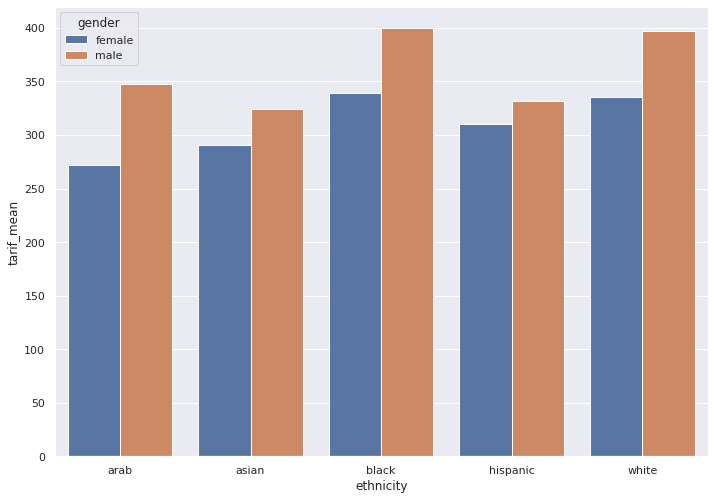

In [30]:
gender = []
ethnicity = []
tarif_mean = []
for k,v in df.groupby(by=["gender","ethnicity"]):
  gender.append(list(k)[0])
  ethnicity.append(list(k)[1])
  tarif_mean.append(v.tarif.mean())

data = {"gender": gender,
        "ethnicity": ethnicity,
        "tarif_mean": tarif_mean
        }
df1 = pd.DataFrame(data)
df1.head()


sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="ethnicity", y="tarif_mean", hue="gender", data=df1)

**Comment** 

We plot, for each ethnicity, the different tariffs per day according to gender. Again, we can see that females, on average, earn a little less than males, but this difference varies according to ethnicity.

### Tarif per job and ethnicity

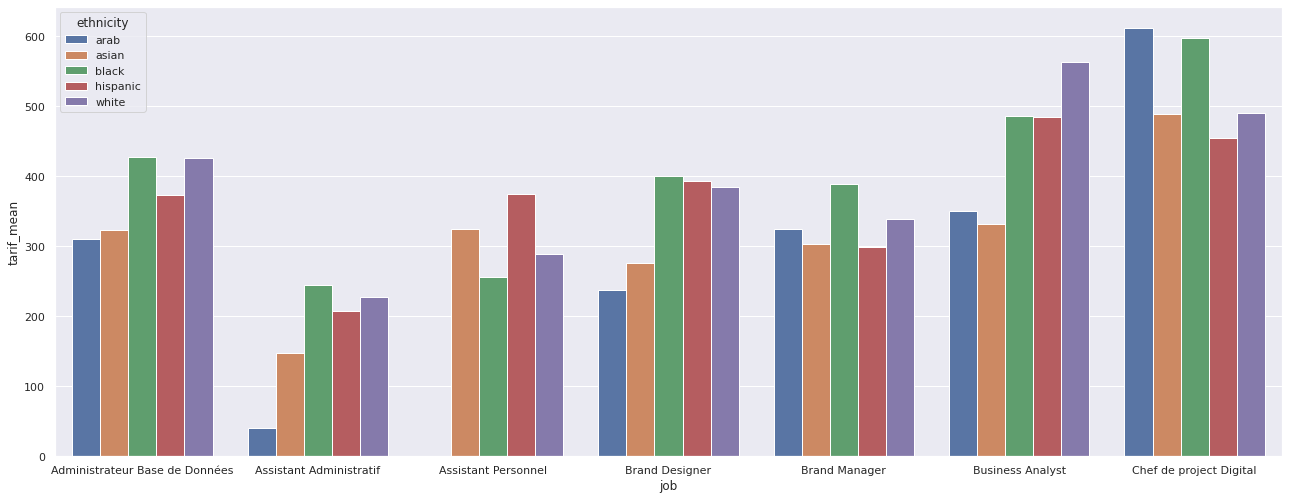

In [31]:
job = []
ethnicity = []
tarif_mean = []
for k,v in df.groupby(by=["searched_job","ethnicity"]):
  job.append(list(k)[0])
  ethnicity.append(list(k)[1])
  tarif_mean.append(v.tarif.mean())

data = {"job": job,
        "ethnicity": ethnicity,
        "tarif_mean": tarif_mean
        }
df2 = pd.DataFrame(data)

sns.set(rc={'figure.figsize':(22,8.27)})
ax = sns.barplot(x="job", y="tarif_mean", hue="ethnicity", data=df2[:34])

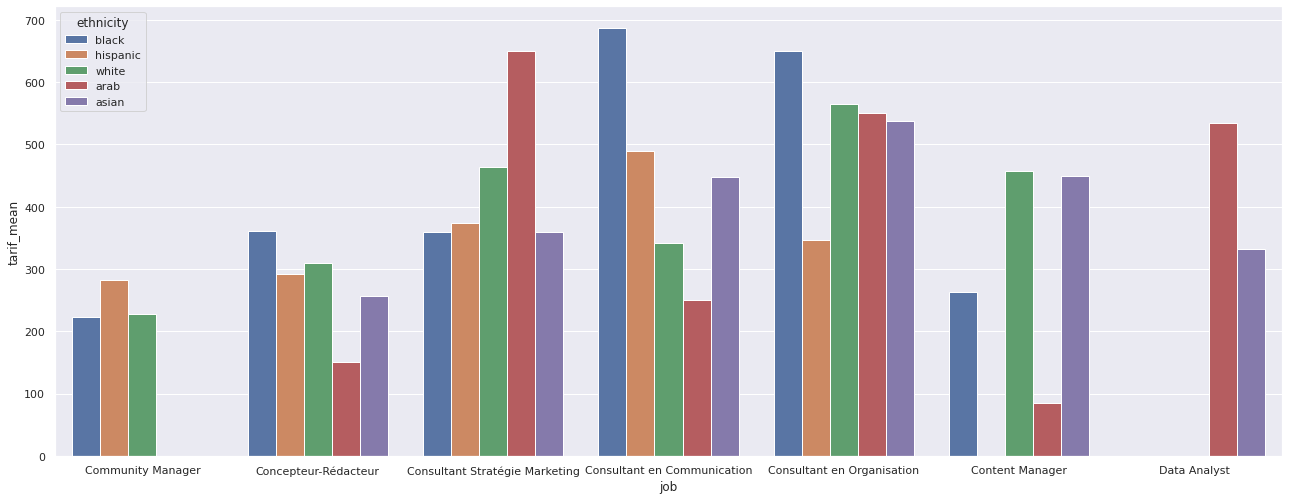

In [32]:
ax = sns.barplot(x="job", y="tarif_mean", hue="ethnicity", data=df2[35:64])

### Top25 skills in the whole platform

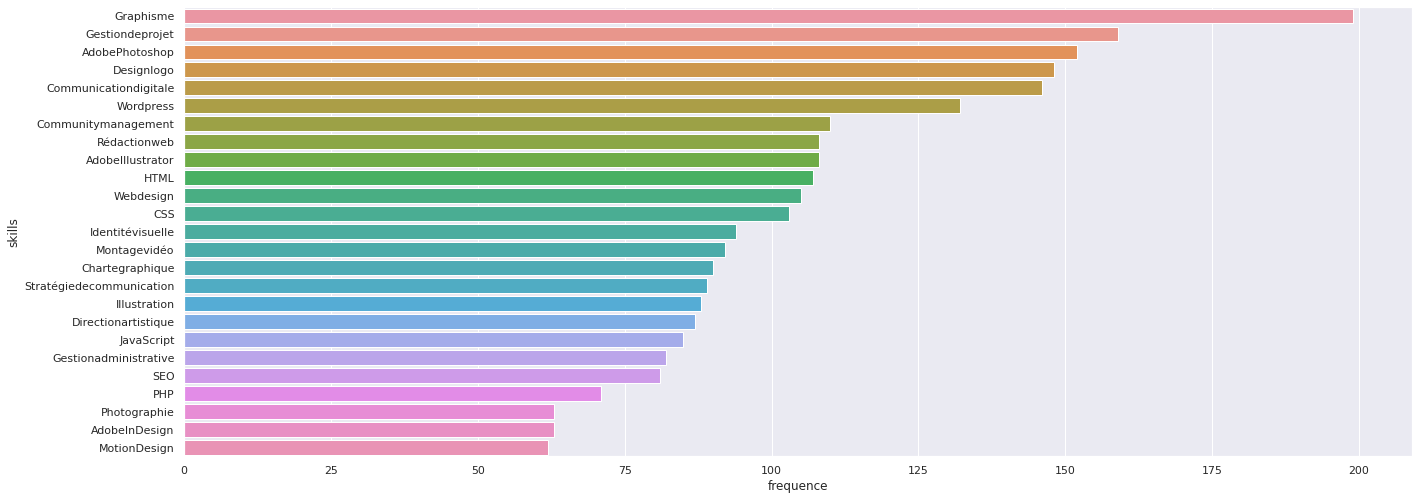

In [33]:
a = dfm.skills.apply(lambda x: x[2:-2].replace("'","").replace(" ","").split(","))

flat_list = [item for sublist in a for item in sublist]
x = Counter(flat_list)
sorted(x)
skills_freq_list = [(l,k) for k,l in sorted([(j,i) for i,j in x.items()], reverse=True)]
top25_skills = skills_freq_list[:25]

dfs = pd.DataFrame(top25_skills)
dfs = dfs.rename(columns={0: "skills", 1: "frequence"})
ax = sns.barplot(x="frequence", y="skills", data=dfs)

### Top10 skills for each different job

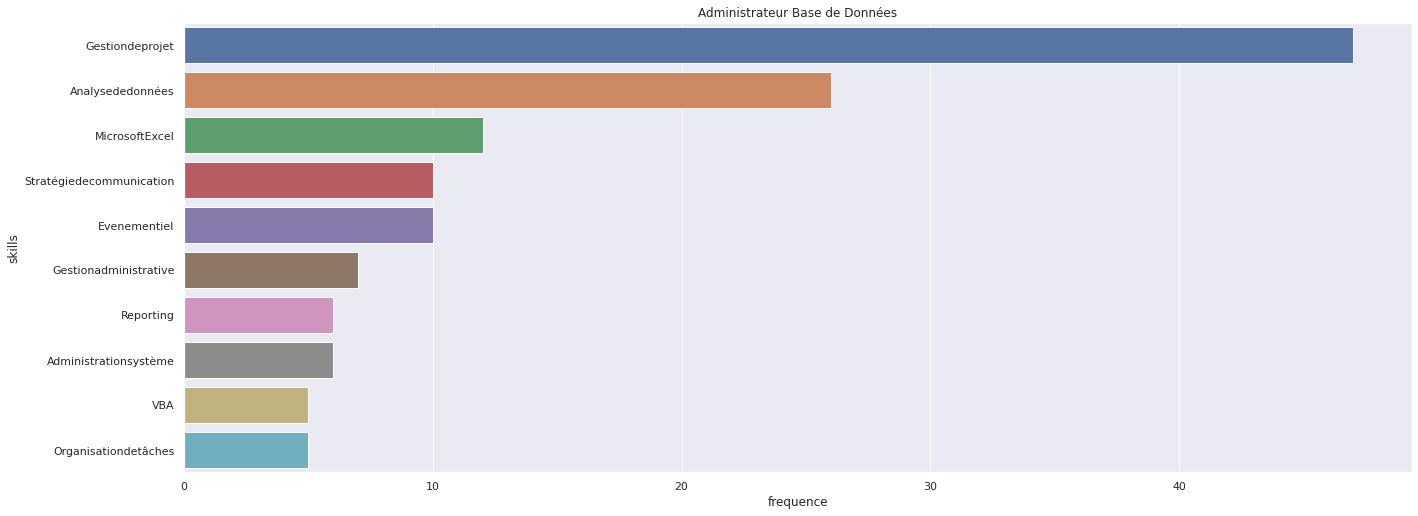

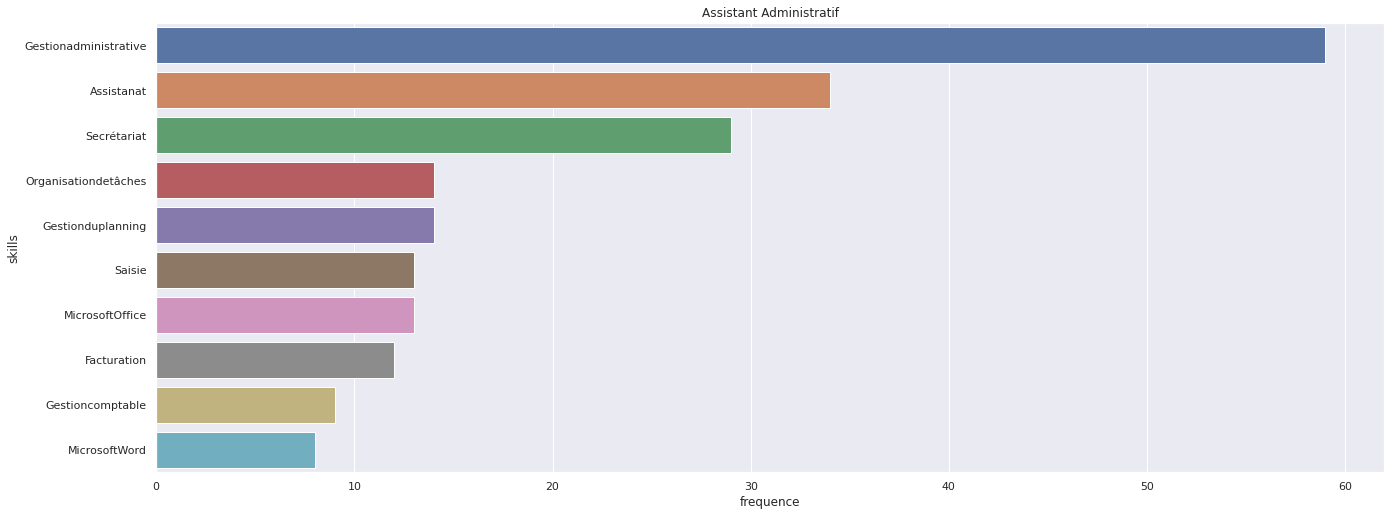

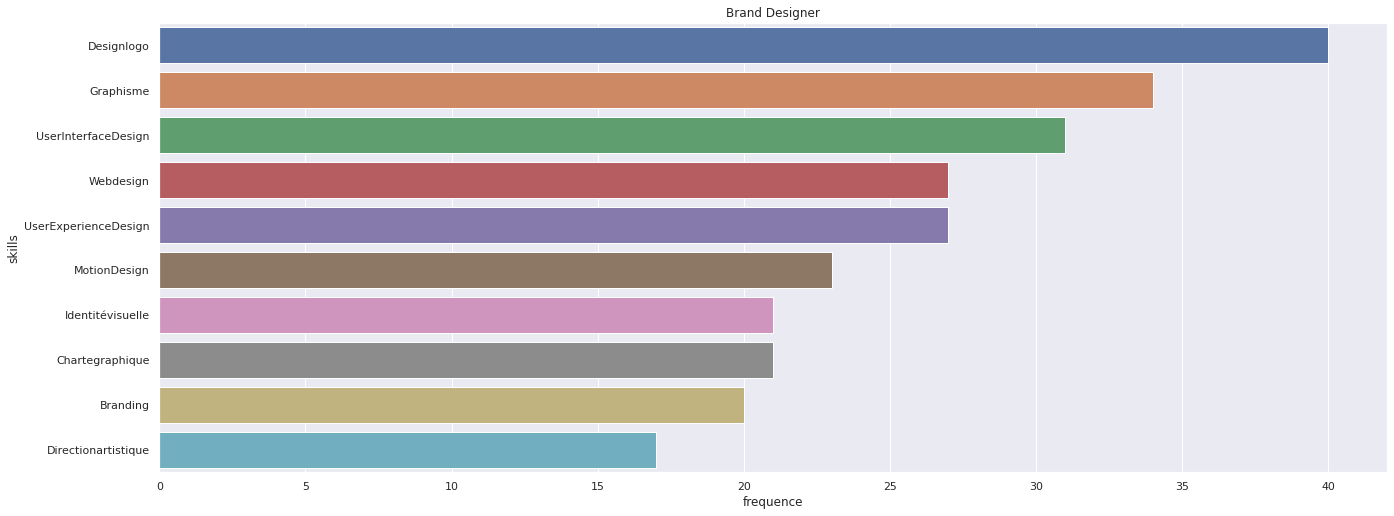

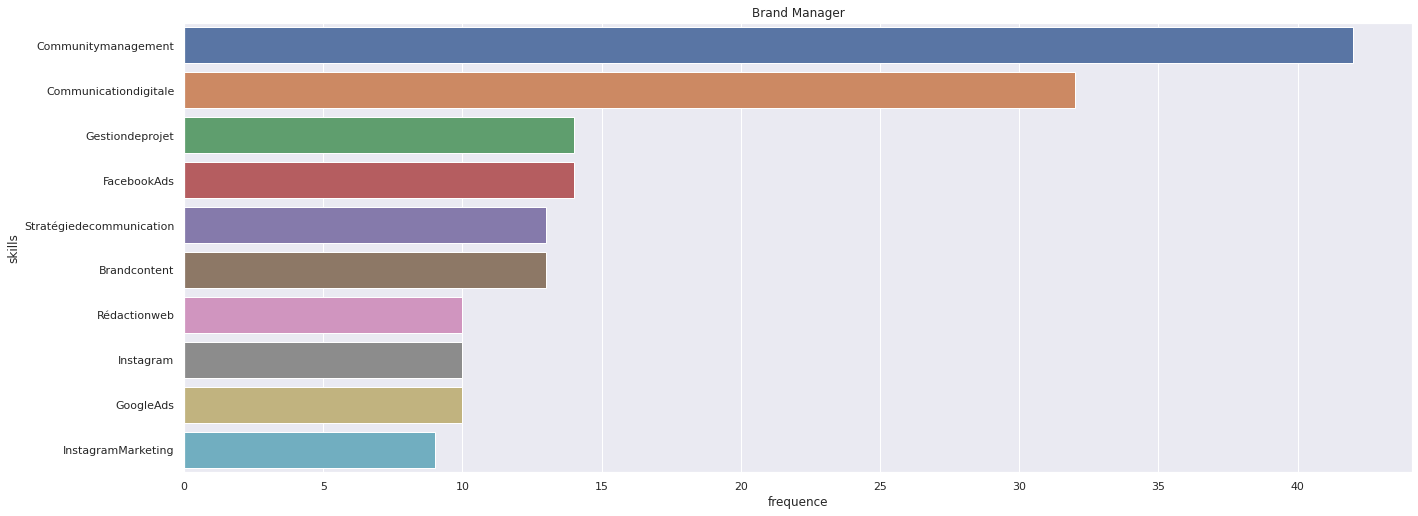

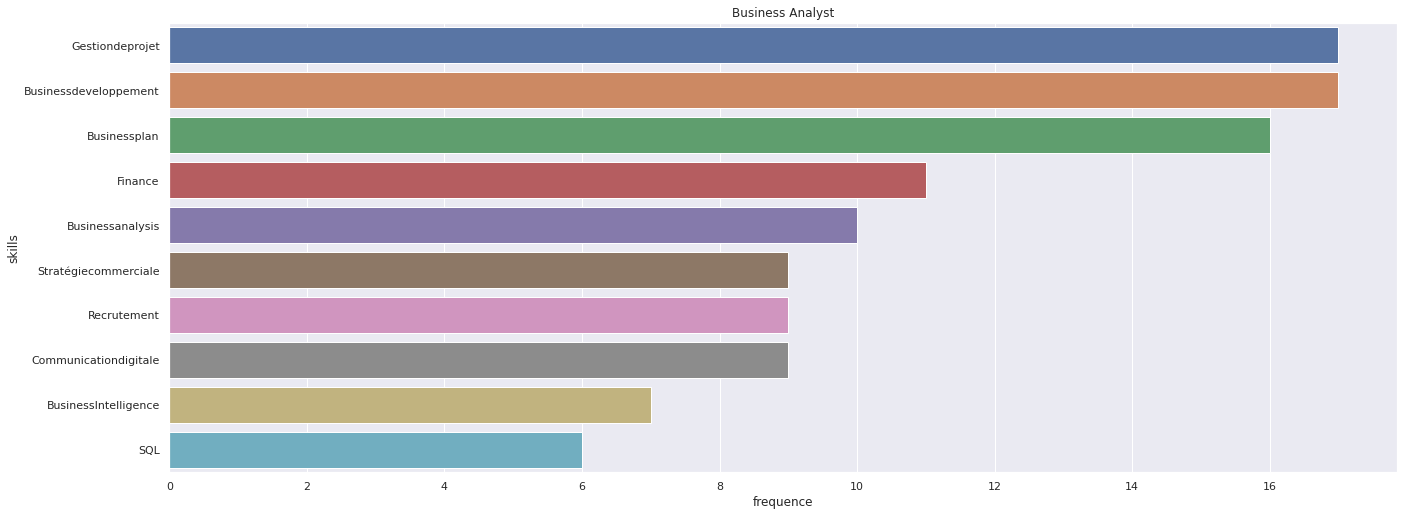

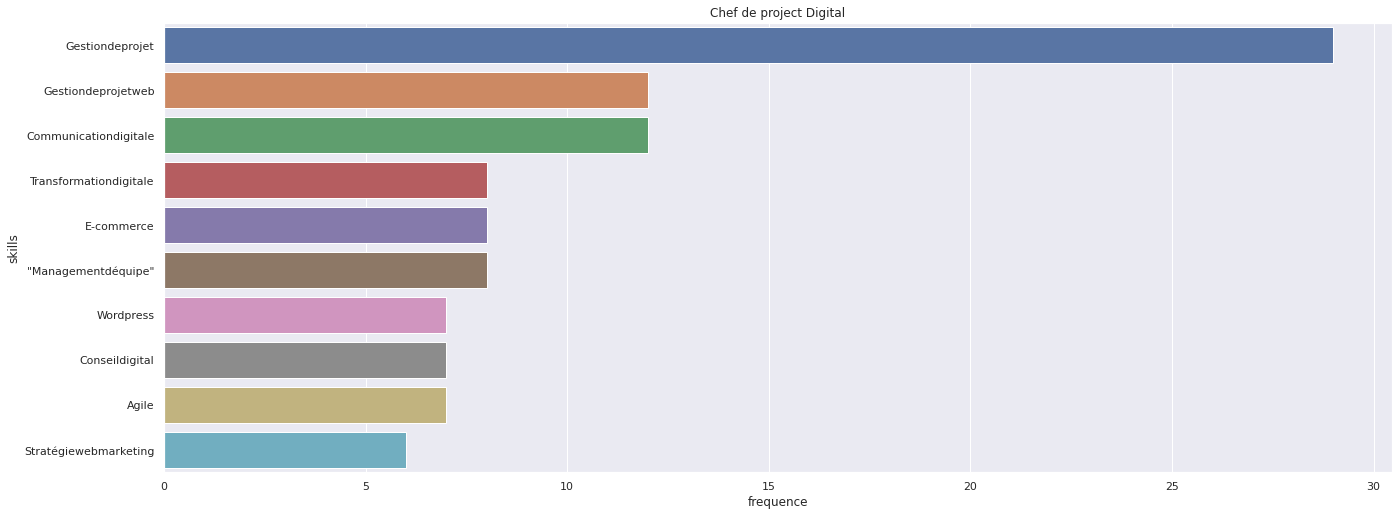

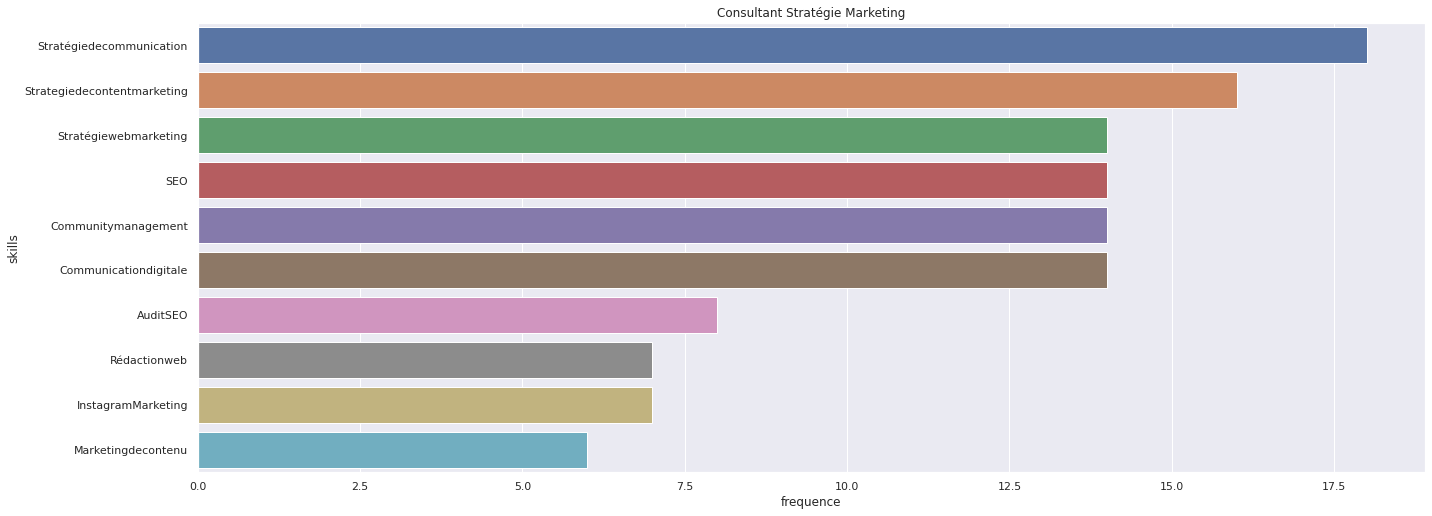

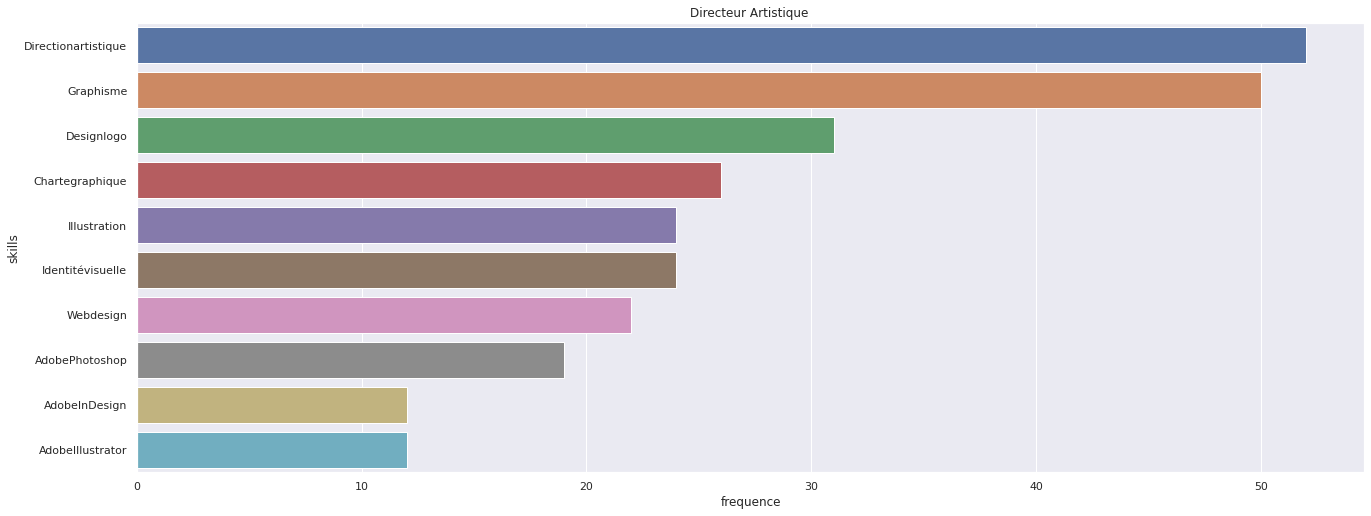

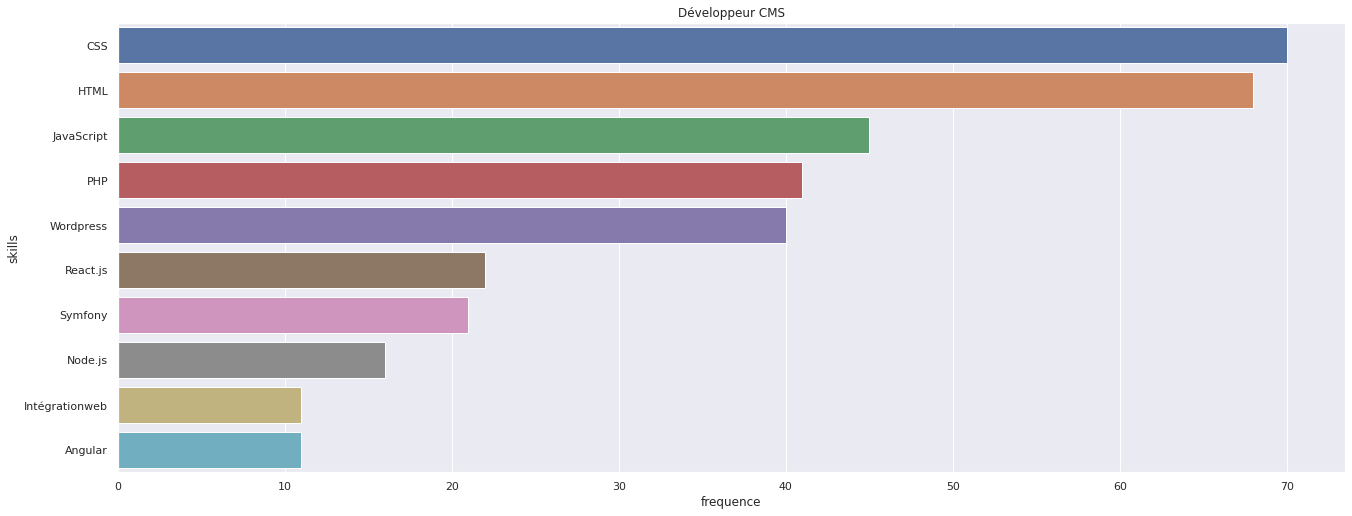

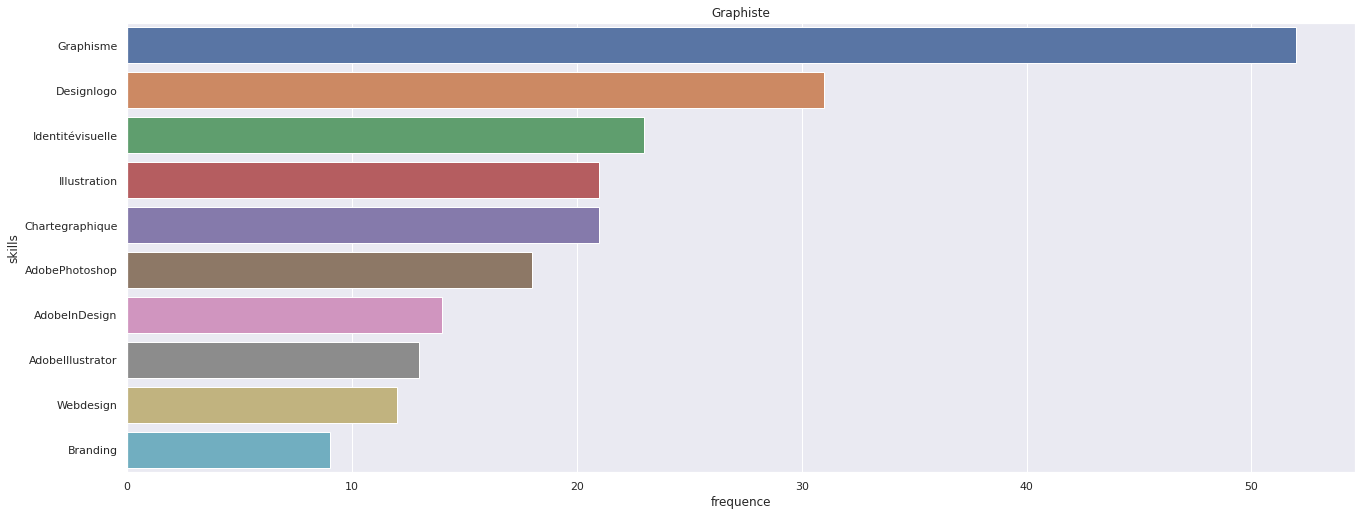

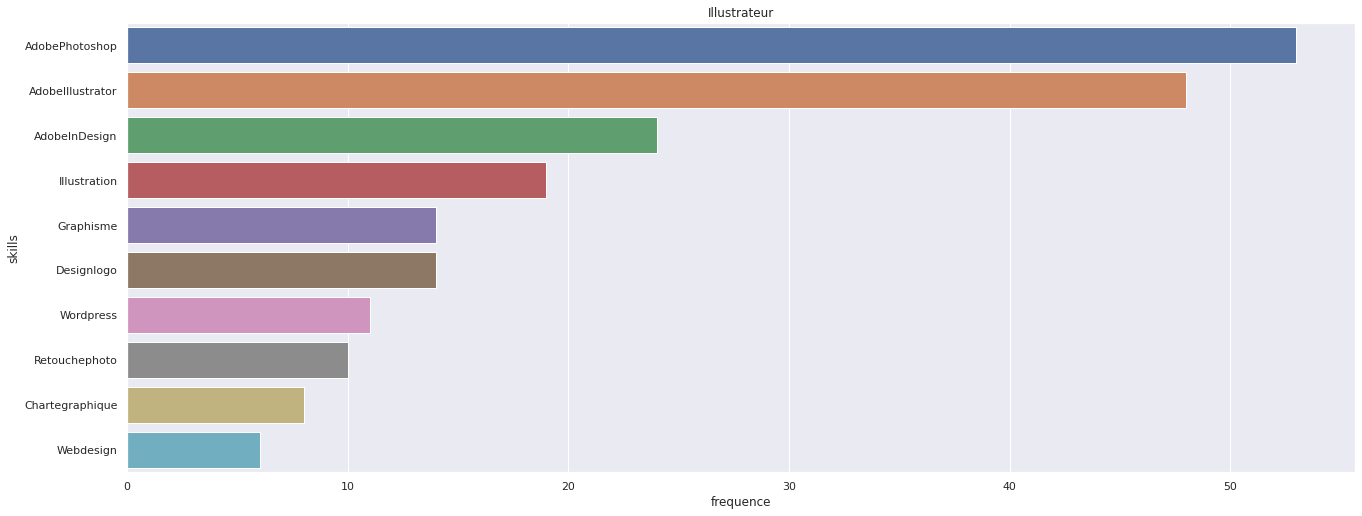

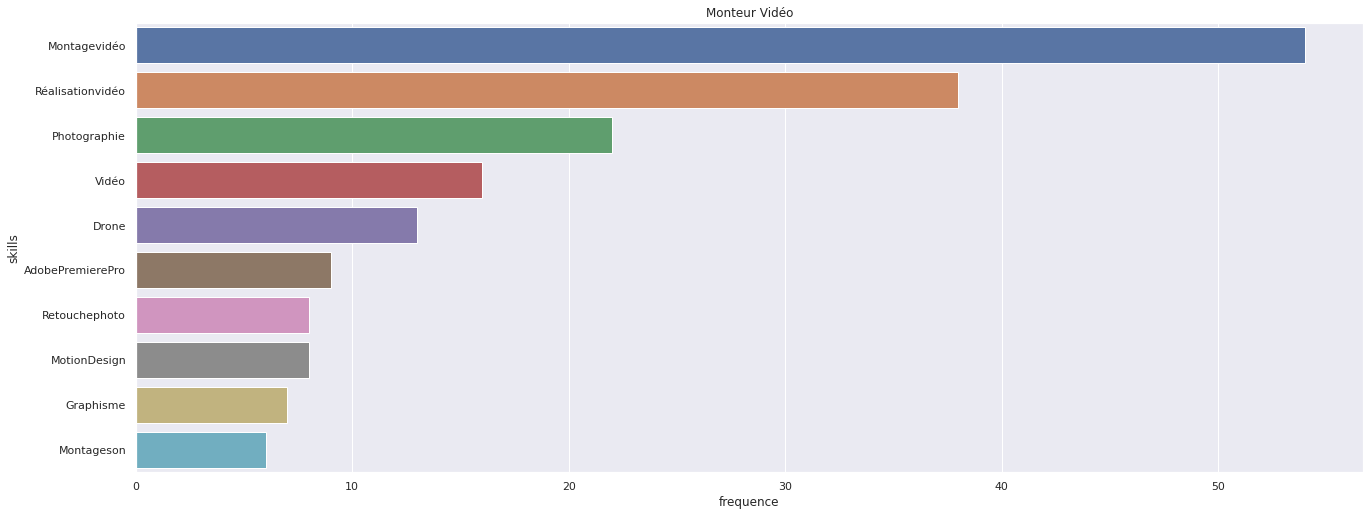

In [34]:
i = 0
for k, v in dfm.groupby(by=["searched_job"]):
  a = v.skills.apply(lambda x: x[2:-2].replace("'","").replace(" ","").split(","))
  flat_list = [item for sublist in a for item in sublist]
  x = Counter(flat_list)
  sorted(x)
  skills_freq_list = [(l,k) for k,l in sorted([(j,i) for i,j in x.items()], reverse=True)]
  top10_skills = skills_freq_list[:10]
  dfs = pd.DataFrame(top10_skills)
  dfs = dfs.rename(columns={0: "skills", 1: "frequence"})
  if dfs.frequence.mean() > 10:
    plt.figure(i)
    plt.title(k)
    ax = sns.barplot(x="frequence", y="skills", data=dfs)
  i = i + 1

**Comment** 

For each searched job we plot the top 10 skills. Since Kamatz in a new platform, for some jobs, there are only few freelancers and so the visualization is not meaning ful. We chose only searched job with a consistent number of freelancers. To see the method see the *if condition* in the code above.

## Are their skills matching the searched tasks?

**How to use the code**

Insert in the string *job* the job that you want to analyze. In our example we insert *Administrateur Base de Données*.

Then a graph shows what are the top 20 skills for that job.

Then, for each freelancer, we calculate if his skills contain at least 30% of the top 20 skills for that job: it means that the searched job matches his skills and so the freelancer is suitable for doing that work. Otherwise the freelancer is not considered. 

We chose the threshold of 30% because higher values lead to very few results.

In [35]:
""" Here is a list with all the jobs """
dfm.searched_job.unique()

array(['Administrateur Base de Données', 'Assistant Administratif',
       'Assistant Personnel', 'Brand Designer', 'Brand Manager',
       'Business Analyst', 'Chef de project Digital', 'Community Manager',
       'Concepteur-Rédacteur', 'Consultant Stratégie Marketing',
       'Consultant en Communication', 'Consultant en Organisation',
       'Content Manager', 'Data Analyst', 'Data Engineer',
       'Data Scientist', 'Directeur Artistique ', 'Développeur CMS',
       'Développeur Web Back-end', 'Développeur Web Front-end',
       'Expert Business Intelligence', 'Graphiste', 'Illustrateur',
       'Ingénieur Logiciel', 'Intégrateur Web', 'Modeleur 3D',
       'Monteur Vidéo', 'Motion Designer', 'Office Manager',
       'Photographe', 'Styliste Mode', 'Traducteur', 'UI Designer',
       'UX Designer', 'Webdesigner'], dtype=object)

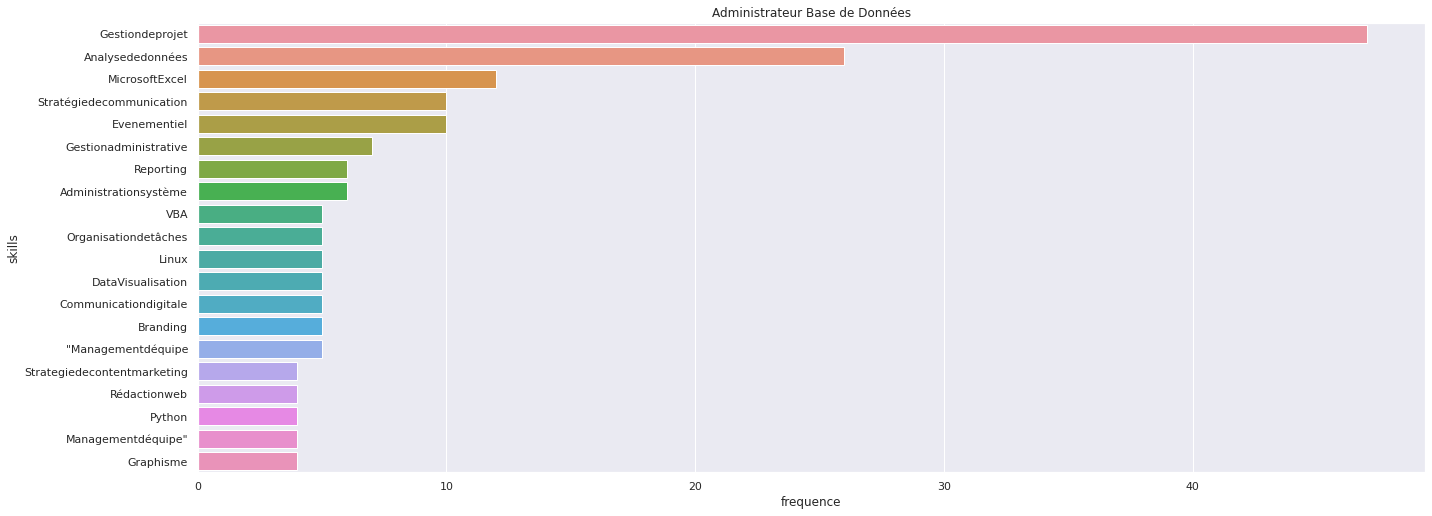

In [36]:
#@title
i = 0
job = "Administrateur Base de Données"
for k, v in dfm.groupby(by=["searched_job"]):
  if k == job:
    a = v.skills.apply(lambda x: x[2:-2].replace("'","").replace(" ","").split(","))
    flat_list = [item for sublist in a for item in sublist]
    x = Counter(flat_list)
    sorted(x)
    skills_freq_list = [(l,k) for k,l in sorted([(j,i) for i,j in x.items()], reverse=True)]
    top20_skills = skills_freq_list[:20]
    dfs = pd.DataFrame(top20_skills)
    dfs = dfs.rename(columns={0: "skills", 1: "frequence"})
    plt.figure(i)
    plt.title(k)
    ax = sns.barplot(x="frequence", y="skills", data=dfs)
  i = i + 1

In [37]:
#@title
top20_skills
dfs = pd.DataFrame(top20_skills) 
dfs = dfs.rename(columns={0: "skills", 1: "frequence"})
top20_skills = list(dfs.skills)

def fromStrtoList(x):
    a = x[2:-2].replace("'","").replace(" ","").split(",")
    return a

def myfunc(x):
  list_skills = fromStrtoList(x)
  tot_skills = len(list_skills)
  count_top_skill = 0
  for skill in list_skills:
    if skill in top20_skills:
      count_top_skill = count_top_skill + 1
  if count_top_skill/tot_skills > 0.3:
    return True
  return False

number_freelancer_shown_by_platform = dfm[ dfm["searched_job"] == 'Administrateur Base de Données'].shape[0]
dfm_administrateur_base_des_donnes = dfm[ dfm["searched_job"] == 'Administrateur Base de Données']
number_freelancer_filter =  dfm_administrateur_base_des_donnes[dfm_administrateur_base_des_donnes.skills.apply(myfunc)].shape[0]
print(f"The total number of freelancers appear for {job} is {number_freelancer_shown_by_platform}, the number of freelancers that has at least {0.3*100}% of skills for that job is {number_freelancer_filter}")

The total number of freelancers appear for Administrateur Base de Données is 150, the number of freelancers that has at least 30.0% of skills for that job is 88


**Comment**
to complete

## Regression tariff

We aim to analyze the determinants of pricing in Kamatz. We fit data into a Regression Model where the variables are the following:


*   **dependent variable**: 
  * *tariff*
*   **independent variables**:
  * *experience*: categorical variable
  * *nb_skills*: numerical variable
  * *recommendations*: numerical variable
  * *ethnicity*: categorical variable
  * *gender*: categorical variable
  * *Searched_job* : categorical variable

For the feature *experience* we use the Ordinal Encoder: 
  * 1 à 2 ans d'expérience: 1
  * 3 à 7 ans d'expérience: 2
  * plus de 7 ans d'expérience: 3 

For the feature *searched_job* we use a particolar approach:
  * We calculate the tarif mean for each searched job on the first 200 rows. Then, we select the top 10 jobs per tarif mean e we create a categorical variable for each of these job that is 1 if a freelancer appears in the first 200 rows of the job and 0 otherwise.

For the other categorical variables `statsmodel` automatically generates a unique dummy for each level (-1).

**Which data do we use?**

For this model, we select the first 200 freelancers for each of top 5 searched jobs. Then, we remove the possible duplicates. We will fit the model with 1057 observations.


#### Preprocess data

In [38]:
url = 'https://raw.githubusercontent.com/RiccardoPrestigiacomo-99/analyse_kam/main/all.csv'
df = pd.read_csv(url, sep = ',')
df = df.dropna().reset_index()

In [39]:
df.drop(columns=["skills_count", "name", "path_to_profile", "fetched_at", "languages", "index", "location", "title", "skills", "months_experience", "search_rank"], inplace=True)

df.tarif = df.tarif.apply(lambda x : x[:x.find("€")])
df.tarif = df.tarif.astype("float")

""" outliers removal """
df = df[(df["ethnicity"]!="native american") & (df["ethnicity"]!="pacific islander")]

""" 
  ordinal encoder for the experience
"""
enc = OrdinalEncoder()
enc.fit(df[["experience"]])
df["experience"] = enc.transform(df[["experience"]])
df["experience"] = df.experience.apply(lambda x: x+1)

print(f"The total number of freelancers of the platform is {df.shape[0]}")

The total number of freelancers of the platform is 28635


In [40]:
df.searched_job = df.searched_job.apply(lambda x : x.replace(" ", "_"))

In [41]:
d = {}
for k,v in df.groupby(by=["searched_job"]):
  #select the first 200 freelancers per searched job
  d[k] = pd.DataFrame(v[0:200])

#dataframe with all the 200 first freelancers for each searched job
dfm = pd.concat(d.values(), ignore_index=True)

#selecting the name of top 10 jobs for tarif average to run the model only in these data
jobs = dfm.groupby(by="searched_job").mean().sort_values(["tarif"], ascending=False).index[:10]

#filtering out data that hasn't these jobs
dfm_filtered = dfm[dfm["searched_job"].isin(jobs)]

#getting categoricals variable for searched job
df_dummy = pd.get_dummies(dfm_filtered, columns=["searched_job"], prefix="", prefix_sep="")
#grouping by id and summing the columns we are able to obtain a row for each id with a dummy variable for each searched_job
dummies_jobs_id = df_dummy.groupby(by="id").sum().iloc[:,-10:]

#joining the filtered dataset (removing duplicates from it) and the dataframe with the dummy variable we obtain the final dataframe
df_final = dfm_filtered.drop_duplicates(subset="id").join(dummies_jobs_id, on="id")
df_final.drop(columns=["id", "searched_job", "sub-region"], inplace=True)

#### Collinearity check
Collinearity is the situation in which two dependent varaibles are higly correlated with each other. Algebraically, this is a problem because the $X'X$ matrix becomes almost-non-invertible.

,experience,nb_skills,recommendations
experience,1.000000,-0.013600,0.035085
nb_skills,-0.013600,1.000000,0.143859
recommendations,0.035085,0.143859,1.000000


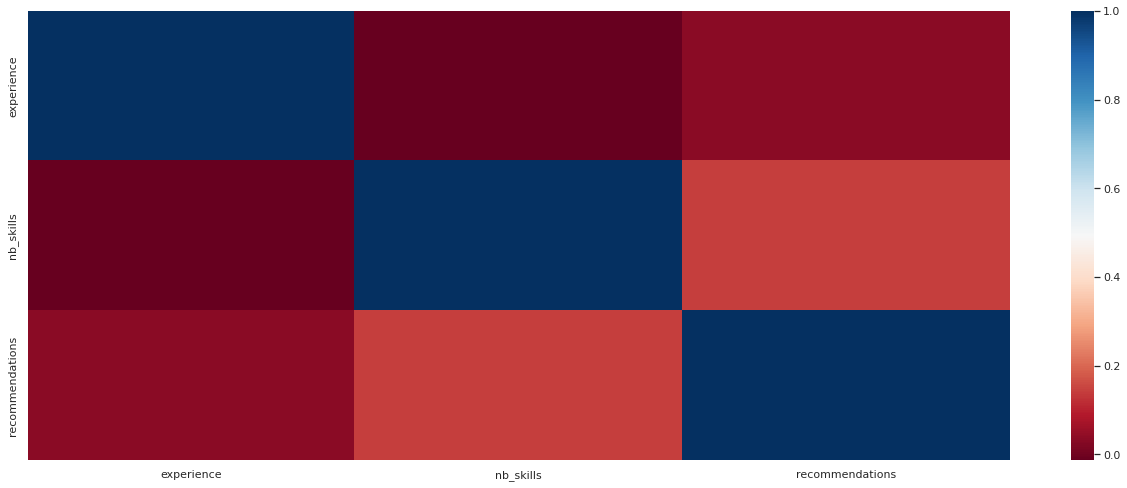

In [42]:
import seaborn as sns
# calculate the correlation matrix
corr = df_final[["experience", "nb_skills", "recommendations"]].corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

**Comment**

We can conclude there's no correlation between the variables.

#### General Model

In [43]:
string = ''
for job in jobs:
  job = job.replace("'", "")
  string += ' + searched_job_'+job
string

' + searched_job_Expert_Business_Intelligence + searched_job_Chef_de_project_Digital + searched_job_Data_Scientist + searched_job_Consultant_en_Organisation + searched_job_Data_Analyst + searched_job_Business_Analyst + searched_job_Data_Engineer + searched_job_Directeur_Artistique_ + searched_job_Consultant_Stratégie_Marketing + searched_job_Styliste_Mode'

the p-value of isEducationListed is 0.993, we can remove it from the model

In [44]:
tarif_model1 = sm.OLS.from_formula('tarif ~ experience + nb_skills + recommendations  +  C(ethnicity, Treatment("white")) + gender  + Expert_Business_Intelligence + Chef_de_project_Digital + Data_Scientist + Consultant_en_Organisation + Data_Analyst + Business_Analyst + Data_Engineer + Directeur_Artistique_ + Consultant_Stratégie_Marketing + Styliste_Mode', df_final).fit()
tarif_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tarif   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     29.51
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           1.81e-80
Time:                        21:58:29   Log-Likelihood:                -7053.3
No. Observations:                1057   AIC:                         1.414e+04
Df Residuals:                    1038   BIC:                         1.424e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                      -46.2754     24.836     -1.863      0.063     -95.010       2.459
C(ethnicity, Treatment("white"))[T.arab]       -20.2173     27.798     -0.727      0.467     -74.764      34.329
C(ethnicity, Treatment("white"))[T.asian]      -31.1009     19.060     -1.632      0.103     -68.500       6.299
C(ethnicity, Treatment("white"))[T.black]       -6.8858     20.803     -0.331      0.741     -47.706      33.934
C(ethnicity, Treatment("white"))[T.hispanic]   -45.3157     21.618     -2.096      0.036     -87.736      -2.896
gender[T.male]                                  42.1343     12.404      3.397      0.001      17.794      66.475
experience                                     154.1980      8.387     18.385      0.000     137.740     170.656
nb_skills                                        0.0931      0.552      0.169      0.866      -0.990       1.176
recommendations                                 28.5492     15.648      1.825      0.068      -2.155      59.254
Expert_Business_Intelligence                    78.2506     17.963      4.356      0.000      43.002     113.499
Chef_de_project_Digital                         99.4336     16.858      5.898      0.000      66.353     132.514
Data_Scientist                                  -6.9774     43.500     -0.160      0.873     -92.336      78.381
Consultant_en_Organisation                      83.4367     16.717      4.991      0.000      50.634     116.239
Data_Analyst                                    57.1974     23.270      2.458      0.014      11.536     102.859
Business_Analyst                                 5.6284     20.601      0.273      0.785     -34.795      46.052
Data_Engineer                                   83.1989     38.359      2.169      0.030       7.928     158.470
Directeur_Artistique_                           72.3323     18.719      3.864      0.000      35.601     109.063
Consultant_Stratégie_Marketing                  35.1822     16.113      2.184      0.029       3.565      66.799
Styliste_Mode                                   49.4499     16.827      2.939      0.003      16.432      82.468
==============================================================================
Omnibus:                      466.153   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5655.090
Skew:                           1.691   Prob(JB):                         0.00
Kurtosis:                      13.815   Cond. No.                         174.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comment**

The reference group for ethnicity is *white*.

The reference group for gender is *female*.

**Analysis of the coefficients**

Analyzing the coefficients of the model we can see that, keeping fixed all other features, and, varying the experience of + 1 the increment in the dependent variable, so the tariff, is $154$. This result is reasonable because, more experience you have and more money you can request.

We do some hypothesis testing to verify the presence of ethnicity discrimination: 

1.   Null hypothesis : $\beta_{ethnicity_{black}} = 0$

The p-value is $0.741$. This means that we (almost) never reject the null hypothesis. We can affirm that the coefficient is equal to zero and so there's no differences between black people's tariff and white people's tariff.

This can be proved by plotting the distribution 

2. Null hypothesis : $\beta_{ethnicity_{hispanic}} = 0$

The p-value is 0.036. It's a very strong value that means we can reject at a very high confidence $\alpha$ the hypothesis thesting. We can conclude that the coefficient is never equal to 0 and so there's a difference between white people's tariff and hispanic's people tariff. The same arguemnt holds for the the ethnicity *Asian* but the p-value is larger so we have a slightly lower probability to reject the hypothesis.

For what concern the variables of the searched job, we can make the following considerations:

1. The coefficient for the variable *Chef_de_project_Digital* is $99.43$ and its p-value is *0*. This means that this variable has a positive influcence on the tarif. This can justified from the fact that it's a high level job that requires experience and other important skills that can be reflected in an higher tarif.

2. Almost every variables have very low p-value, very close to zero, apart from *Data Scientist* and *Business Analyst*. We would expect a low p-value from these two variables because those are job that are very trending in this years and they should influence the tarif of a freelancer.


Finally, we can make a consideration looking at the value of $R^2$, that should explain how much proportion of variance of our dependent variable is explained from our model. Its value for our model is $0.327$, it's not a very good result but it still indicates that exists a weak or low effect size dependency. Its low value can be associated also to the fact that we do not have enough data for each searched job.



#### Model for selected searched job (DEPRECATED, **see the first comment**)

Before using a variable for each searched job, we've approached the problem in a different view. We've ran a model for selected searched job as you can see in the below cells. Doing so, we couldn't understand if a different job could influence the tarif. So, we've decided to use the above approach that we think is more suited for our analysis.

##### Approach

However, running the model in the whole dataset, so among different type of job search, we know that for each job the salary can be very different. The problem is that the model above isn't taking into consideration that. So, we thought that we could do a model for each searched job. 

Since they are too many, we've selected the top 5 jobs per tarif mean. Then we've selected the first 250 rows based on search rank for each of these jobs and we run a model for each of it. The features used in these model are identical to those used in the general model above.

In [45]:
url = 'https://raw.githubusercontent.com/RiccardoPrestigiacomo-99/analyse_kam/main/all.csv'
df = pd.read_csv(url, sep = ',')

df = df[(df["ethnicity"]!="native american") & (df["ethnicity"]!="pacific islander")]
df.drop(columns=["id","skills_count", "name", "path_to_profile", "fetched_at", "languages", "location", "title", "skills", "isEducationListed", "months_experience"], inplace=True)

"""
mapping tarif to an integer
"""
df.tarif = df.tarif.apply(lambda x : x[:x.find("€")])
df.tarif = df.tarif.astype("float")

""" 
  ordinal encoder for the experience
"""
enc = OrdinalEncoder()
enc.fit(df[["experience"]])
df["experience"] = enc.transform(df[["experience"]])
df["experience"] = df.experience.apply(lambda x: x+1)

In [46]:
d = {}
for k,v in df.groupby(by=["searched_job"]):
  """ we only keep the first 200 results for each searched_job """
  d[k] = pd.DataFrame(v[0:200])
  
dfm = pd.concat(d.values(), ignore_index=True)

#selecting the top 5 jobs for tarif average to run the model only in these data
jobs = dfm.groupby(by="searched_job").mean().sort_values(["tarif"], ascending=False).index[:5]

In [47]:
#loop over searched jobs()
models = []
for job in jobs:
  print("job:"+job)

  #selecting the first 250 results ordered by search rank
  data = df[df["searched_job"]==job].sort_values(["search_rank"]).iloc[:250]


  #model
  models.append(sm.OLS.from_formula('tarif ~ experience + nb_skills + recommendations +  C(ethnicity, Treatment("white")) + gender ', data).fit())

job:Expert Business Intelligence
job:Chef de project Digital
job:Data Scientist
job:Consultant en Organisation
job:Data Analyst


In [48]:
stargazer_tab = Stargazer(models)
stargazer_tab.custom_columns(list(jobs), [1, 1, 1, 1, 1])
stargazer_tab

In [49]:
models[4].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tarif   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     15.63
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           1.74e-18
Time:                        21:58:30   Log-Likelihood:                -1718.3
No. Observations:                 250   AIC:                             3455.
Df Residuals:                     241   BIC:                             3486.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       26.1729     53.821      0.486      0.627     -79.847     132.193
C(ethnicity, Treatment("white"))[T.arab]         9.3963     57.147      0.164      0.870    -103.175     121.968
C(ethnicity, Treatment("white"))[T.asian]      -70.2898     43.678     -1.609      0.109    -156.329      15.749
C(ethnicity, Treatment("white"))[T.black]      -54.2089     51.553     -1.052      0.294    -155.762      47.344
C(ethnicity, Treatment("white"))[T.hispanic]  -120.5994     61.233     -1.970      0.050    -241.221       0.022
gender[T.male]                                  69.0905     32.705      2.113      0.036       4.666     133.515
experience                                     191.4457     19.925      9.608      0.000     152.197     230.695
nb_skills                                        0.3036      1.311      0.232      0.817      -2.278       2.886
recommendations                                -21.9195     86.224     -0.254      0.800    -191.768     147.929
==============================================================================
Omnibus:                      124.617   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1430.825
Skew:                           1.664   Prob(JB):                    2.00e-311
Kurtosis:                      14.238   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Results analysis

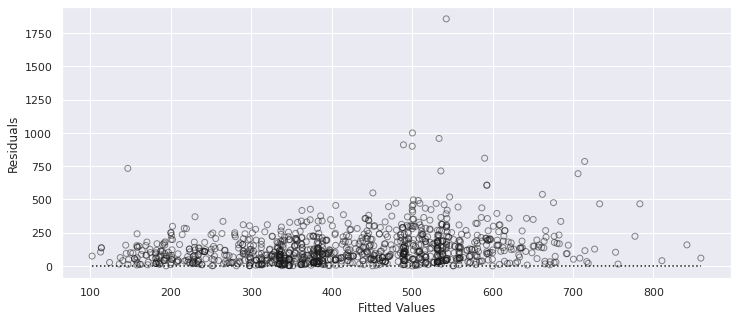

In [50]:
fig, ax = plt.subplots(figsize=(12,5)) 

# Compute fitted values and residuals
y_hat = tarif_model1.predict(df_final)
e = np.abs(df_final["tarif"] - y_hat)

# Plot 
ax.scatter(x=y_hat, y=e, facecolors='None', edgecolors='k', alpha=.5)
ax.set_xlabel('Fitted Values'); ax.set_ylabel('Residuals');
ax.hlines(0,xmin=ax.xaxis.get_data_interval()[0],
           xmax=ax.xaxis.get_data_interval()[1], linestyles='dotted',color='k')

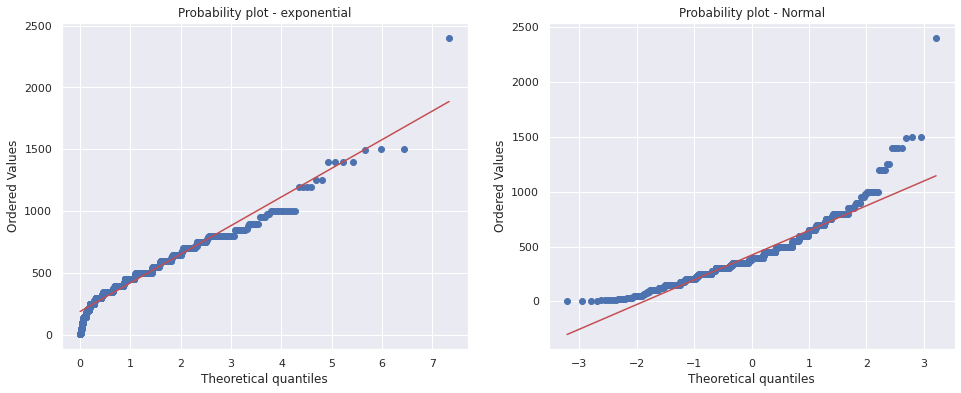

In [51]:
import scipy.stats as st

plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
st.probplot(df_final["tarif"], dist=st.expon, plot=plt);
plt.title("Probability plot - exponential")


plt.subplot(1, 2, 2)
st.probplot(df_final["tarif"], dist="norm", plot=plt);
plt.title("Probability plot - Normal");


**Comment**

With the above probability plot we are checking if our dependent variable follow a selected probability distribution. As we can see, *tarif* doesn't follow a Normal distribution while we can notice that it follows an exponential distribution.

In [52]:
tarif_model1.params[-10:]

Expert_Business_Intelligence      78.250612
Chef_de_project_Digital           99.433610
Data_Scientist                    -6.977365
Consultant_en_Organisation        83.436673
Data_Analyst                      57.197439
Business_Analyst                   5.628432
Data_Engineer                     83.198885
Directeur_Artistique_             72.332331
Consultant_Stratégie_Marketing    35.182210
Styliste_Mode                     49.449935
dtype: float64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


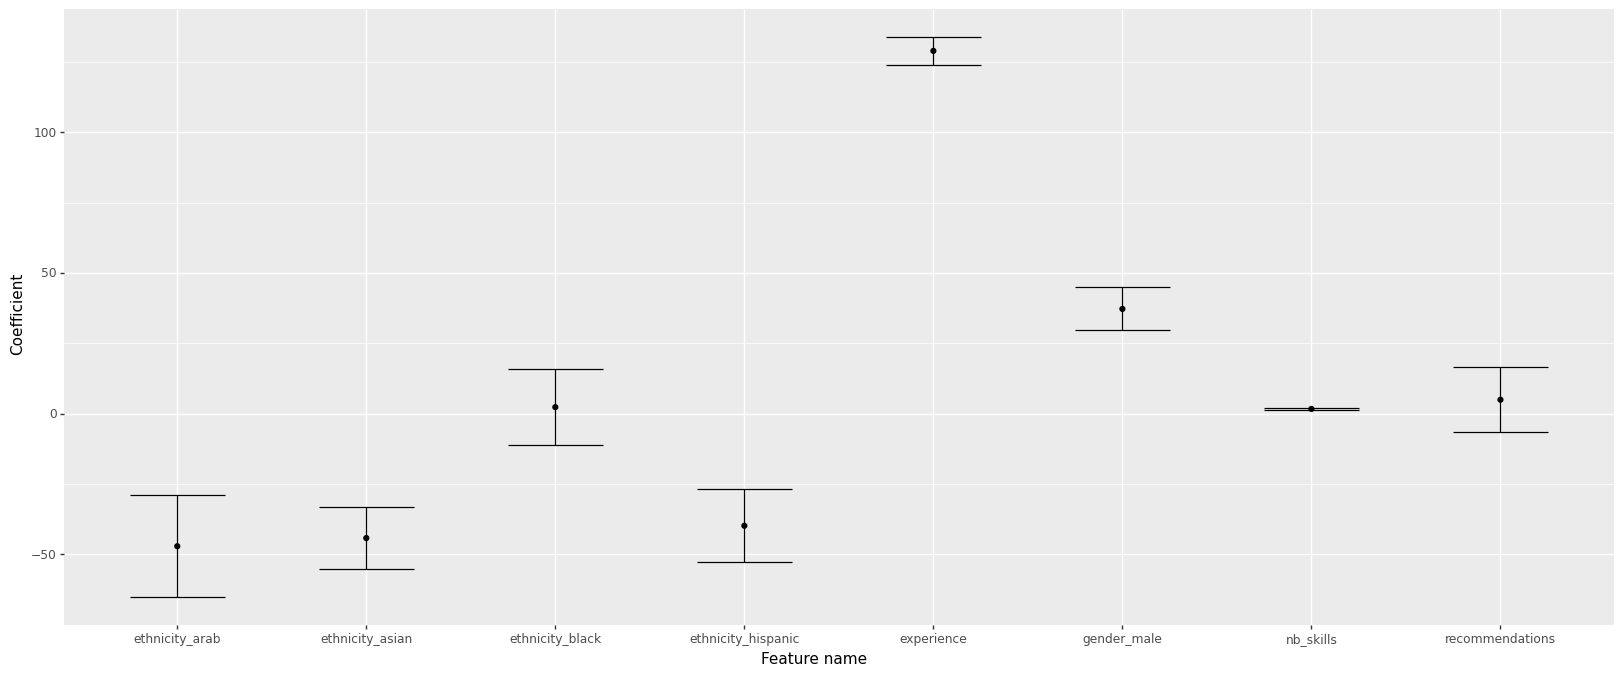

<ggplot: (8730841736977)>

In [53]:
#@title
serie = pd.Series(data=[-47.153542, -44.246996, 2.281718, -39.866043, 37.196780, 128.902629, 1.647009, 4.926542], index = ["ethnicity_arab", 
                                                                                                                   "ethnicity_asian", 
                                                                                                                   "ethnicity_black",
                                                                                                                   "ethnicity_hispanic",
                                                                                                                   "gender_male",
                                                                                                                   "experience",
                                                                                                                   "nb_skills",
                                                                                                                   "recommendations"])
bse = pd.Series(data=[18.045423, 11.077280, 13.498640, 12.983752, 7.612991, 4.929459, 0.381257, 11.495440], index = ["ethnicity_arab", 
                                                                                                                   "ethnicity_asian", 
                                                                                                                   "ethnicity_black",
                                                                                                                   "ethnicity_hispanic",
                                                                                                                   "gender_male",
                                                                                                                   "experience",
                                                                                                                   "nb_skills",
                                                                                                                   "recommendations"])

# Put the results into a dataframe with Name, Coefficient, Error
res_df = (
    pd.concat([serie, bse], axis=1)
    .reset_index()
    .rename(columns={"index": "Feature name", 0: "Coefficient", 1: "Error"})
)
# Plot the coefficient values and their errors
(
    ggplot(res_df)
    + geom_point(aes("Feature name", "Coefficient"))
    + geom_errorbar(aes(x="Feature name", ymin="Coefficient-Error", ymax="Coefficient+Error"))
    + theme(figure_size=(20, 8)) 
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


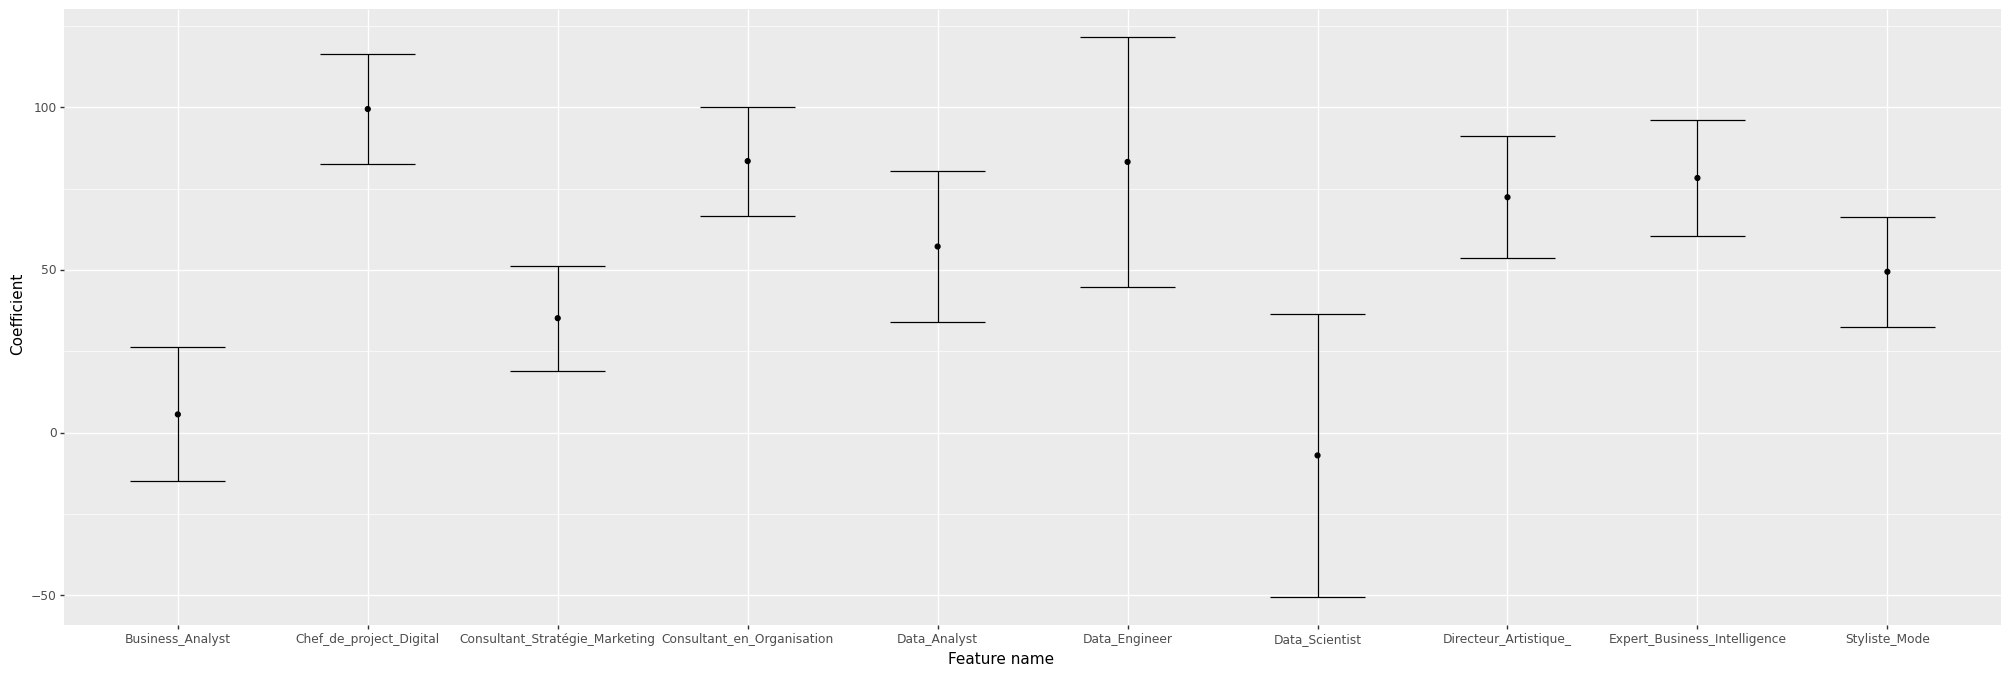

<ggplot: (8730841748201)>

In [54]:
#@title
#only for searched job variables
res_df = (
    pd.concat([tarif_model1.params[-10:], tarif_model1.bse[-10:]], axis=1)
    .reset_index()
    .rename(columns={"index": "Feature name", 0: "Coefficient", 1: "Error"})
)
# Plot the coefficient values and their errors
(
    ggplot(res_df)
    + geom_point(aes("Feature name", "Coefficient"))
    + geom_errorbar(aes(x="Feature name", ymin="Coefficient-Error", ymax="Coefficient+Error"))
    + theme(figure_size=(25, 8)) 
)

The above graph represent the coefficient of our regression model and their standard errors.

## Regression rank

We aim to analyze the rank algorithm in Kamatz. We fit data into a Regression Model where the variables are the following:


*   **dependent variable**: 
  * *rank*
*   **independent variables**:
  * *experience*: categorical variable
  * *nb_skills*: numerical variable
  * *recommendations*: numerical variable
  * *tarif*: categorical variable
  * *skill_match*: binary variable
  * *gender*
  * *ethnicity*


For the feature *experience* we use the Ordinal Encoder: 
  * 1 à 2 ans d'expérience: 1
  * 3 à 7 ans d'expérience: 2
  * plus de 7 ans d'expérience: 3 

For the other categorical variables `statsmodel` automatically generates a unique dummy for each level (-1).

*skill_match* is a binary variable created by us for the purpose of the analysis. We cannot prove that if your job description fits for a certain job, the skills match with the job or they are enough. So we create this binary variable that is:
*   1: if freelancer skills contains at least 30% of the top10skills for that job. This it means that the freelancer is more suitable for that job;
*   0: otherwise.


The aim is to figure out if Kamatz shows first freelancers more suitable for that job. The field *nb_skills* is not enough because does not say anything about the quality or the importance of the skills, therefore, we create this binary variable.

**Which data do we use?**

Since we are interesting in analyzing the rank, that is different for each job, we build 5 regression models: one for each searched job. 
The jobs choosen are:
*  Administrateur Base de Données (684 observations)
*  Consultant en organisation (572 observations)
*  Content Designer (278 observations)
*  Motion Designer (278 observations)

### Preprocess data

In [55]:
df = pd.read_csv(url, sep = ',')
d = {}
for k,v in df.groupby(by=["searched_job"]):
  """ we only keep the first 30% of results for each searched_job """
  len_data_set = v.shape[0]
  tot = int(len_data_set / 100 * 30)
  d[k] = pd.DataFrame(v[:tot])
  
dfm = pd.concat(d.values(), ignore_index=True)

# dfm.drop_duplicates(subset="id",inplace=True)
# print(dfm.shape)

In [56]:
dfm.drop(columns=["id","skills_count", "name", "path_to_profile", "fetched_at", "languages", "location", "title", "months_experience"], inplace=True)

dfm.tarif = dfm.tarif.apply(lambda x : x[:x.find("€")])
dfm.tarif = dfm.tarif.astype("float")

""" outliers removal """
dfm = dfm[(dfm["ethnicity"]!="native american") & (dfm["ethnicity"]!="pacific islander")]

""" 
  ordinal encoder for the experience
"""
enc = OrdinalEncoder()
enc.fit(dfm[["experience"]])
dfm["experience"] = enc.transform(dfm[["experience"]])
dfm["experience"] = dfm.experience.apply(lambda x: x+1)

print(f"The total number of freelancers of the platform is {dfm.shape[0]}")

The total number of freelancers of the platform is 8589


### Model

#### Administrateur base des données

In [59]:
dfm_abdd = dfm[ dfm["searched_job"] == "Administrateur Base de Données" ]
dfm_abdd["skill_match"] = dfm_abdd.skills.apply(myfunc) == True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
rank_model1 = sm.OLS.from_formula('search_rank ~ experience + nb_skills + recommendations + tarif + skill_match + gender + ethnicity', dfm_abdd).fit()
rank_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            search_rank   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.837
Date:                Sun, 23 Jan 2022   Prob (F-statistic):             0.0512
Time:                        22:01:17   Log-Likelihood:                -4576.6
No. Observations:                 684   AIC:                             9175.
Df Residuals:                     673   BIC:                             9225.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               326.9753     44.424      7.360      0.000     239.749     414.201
skill_match[T.True]     -45.2408     15.561     -2.907      0.004     -75.794     -14.688
gender[T.male]          -11.7700     15.552     -0.757      0.449     -42.306      18.766
ethnicity[T.asian]       17.6745     42.583      0.415      0.678     -65.937     101.286
ethnicity[T.black]       20.2010     46.037      0.439      0.661     -70.193     110.595
ethnicity[T.hispanic]    62.4286     44.256      1.411      0.159     -24.468     149.325
ethnicity[T.white]       61.9861     38.676      1.603      0.109     -13.953     137.925
experience               -3.6312     11.996     -0.303      0.762     -27.185      19.923
nb_skills                 0.4906      0.745      0.659      0.510      -0.971       1.952
recommendations          10.0691     25.053      0.402      0.688     -39.123      59.261
tarif                    -0.0246      0.038     -0.653      0.514      -0.098       0.049
==============================================================================
Omnibus:                      280.930   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.254
Skew:                           0.045   Prob(JB):                     1.34e-08
Kurtosis:                       1.876   Cond. No.                     5.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Comment**

The coefficients of the *skill_match* is -45.2408 and its p-value is 0.004. This is a very interesting information because we can adfirm that the ranking algorithm displays first the ones with the skills that match the selected jobs. So, if your skills match with the job, is more likely that you will be in the first pages.

#### Consultant en organisation

In [61]:
dfm_job2 = dfm[ dfm["searched_job"] == "Consultant en Organisation" ]
dfm_job2["skill_match"] = dfm_job2.skills.apply(myfunc) == True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
rank_model2 = sm.OLS.from_formula('search_rank ~ experience + nb_skills + recommendations + tarif + skill_match + gender + ethnicity', dfm_job2).fit()
rank_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            search_rank   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.668
Date:                Sun, 23 Jan 2022   Prob (F-statistic):             0.0849
Time:                        22:01:17   Log-Likelihood:                -3724.3
No. Observations:                 572   AIC:                             7471.
Df Residuals:                     561   BIC:                             7518.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               328.4679     37.839      8.681      0.000     254.145     402.791
skill_match[T.True]      -3.6493     14.659     -0.249      0.804     -32.443      25.145
gender[T.male]          -10.2039     14.300     -0.714      0.476     -38.292      17.884
ethnicity[T.asian]      -45.0684     35.068     -1.285      0.199    -113.948      23.811
ethnicity[T.black]      -76.6635     38.781     -1.977      0.049    -152.838      -0.489
ethnicity[T.hispanic]   -50.0264     38.043     -1.315      0.189    -124.750      24.697
ethnicity[T.white]      -31.7759     31.340     -1.014      0.311     -93.334      29.783
experience                3.0648     10.518      0.291      0.771     -17.594      23.724
nb_skills                 1.5067      0.656      2.297      0.022       0.218       2.795
recommendations           3.0970     27.852      0.111      0.912     -51.611      57.805
tarif                    -0.0608      0.029     -2.065      0.039      -0.119      -0.003
==============================================================================
Omnibus:                      232.595   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.307
Skew:                          -0.005   Prob(JB):                     2.62e-07
Kurtosis:                       1.872   Cond. No.                     5.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Content Manager

In [63]:
dfm_job3 = dfm[ dfm["searched_job"] == "Content Manager" ]
dfm_job3["skill_match"] = dfm_job3.skills.apply(myfunc) == True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
rank_model3 = sm.OLS.from_formula('search_rank ~ experience + nb_skills + recommendations + tarif + skill_match + gender + ethnicity', dfm_job3).fit()
rank_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            search_rank   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     2.340
Date:                Sun, 23 Jan 2022   Prob (F-statistic):             0.0119
Time:                        22:01:17   Log-Likelihood:                -1466.5
No. Observations:                 258   AIC:                             2955.
Df Residuals:                     247   BIC:                             2994.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               120.2599     27.776      4.330      0.000      65.552     174.967
skill_match[T.True]     -12.9666      9.453     -1.372      0.171     -31.586       5.653
gender[T.male]           26.6256      9.808      2.715      0.007       7.307      45.944
ethnicity[T.asian]        0.5944     26.139      0.023      0.982     -50.889      52.078
ethnicity[T.black]        5.3222     28.897      0.184      0.854     -51.593      62.238
ethnicity[T.hispanic]   -29.7317     26.902     -1.105      0.270     -82.719      23.256
ethnicity[T.white]      -16.7675     24.084     -0.696      0.487     -64.203      30.668
experience               12.6139      7.935      1.590      0.113      -3.015      28.243
nb_skills                -0.0971      0.443     -0.219      0.826      -0.969       0.775
recommendations         -13.5052     14.890     -0.907      0.365     -42.834      15.823
tarif                    -0.0186      0.030     -0.616      0.538      -0.078       0.041
==============================================================================
Omnibus:                       58.582   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.904
Skew:                           0.045   Prob(JB):                      0.00260
Kurtosis:                       1.952   Cond. No.                     4.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Motion Designer

In [65]:
dfm_job4 = dfm[ dfm["searched_job"] == "Motion Designer" ]
dfm_job4["skill_match"] = dfm_job4.skills.apply(myfunc) == True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
rank_model4 = sm.OLS.from_formula('search_rank ~ experience + nb_skills + recommendations + tarif + skill_match + gender + ethnicity', dfm_job4).fit()
rank_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            search_rank   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.036
Date:                Sun, 23 Jan 2022   Prob (F-statistic):              0.414
Time:                        22:01:17   Log-Likelihood:                -1569.0
No. Observations:                 272   AIC:                             3160.
Df Residuals:                     261   BIC:                             3200.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               151.7321     28.478      5.328      0.000      95.657     207.807
skill_match[T.True]      31.9709     17.504      1.827      0.069      -2.495      66.437
gender[T.male]           -7.0735     10.245     -0.690      0.491     -27.247      13.100
ethnicity[T.asian]       11.5319     28.114      0.410      0.682     -43.828      66.892
ethnicity[T.black]       44.6428     29.664      1.505      0.134     -13.768     103.054
ethnicity[T.hispanic]    11.9527     29.434      0.406      0.685     -46.005      69.910
ethnicity[T.white]       18.5487     24.523      0.756      0.450     -29.739      66.836
experience               -5.6928      8.118     -0.701      0.484     -21.678      10.293
nb_skills                -0.3680      0.473     -0.778      0.437      -1.300       0.564
recommendations          -0.6391      9.612     -0.066      0.947     -19.566      18.288
tarif                    -0.0404      0.042     -0.967      0.335      -0.123       0.042
==============================================================================
Omnibus:                       74.903   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.377
Skew:                          -0.028   Prob(JB):                      0.00125
Kurtosis:                       1.915   Cond. No.                     4.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""